<h1>Case study: univariate time series analysis and forecasting of pharmaceutical products’ sales data at small scale</h1>

<blockquote>The objective of the research behind the paper was to validate different methods and approaches related to sales time series data preparation, analysis and forecasting, with aim to facilitate recommending sales and marketing strategies based on trend/seasonality effects and forecasting sales of eight different groups of pharmaceutical products with diverse characteristics, such as stationarity, seasonality, amount of residuals and sales data variance. All these analyses and forecasts are made on a small scale, for a single distributor, pharmacy chain or even individual pharmacy. Paper presents only research work related to univariate time series analysis, while potential candidates for explanatory input variables were also identified and shortly elaborated. Effectiveness of three forecasting methods, namely ARIMA, Facebook’s Prophet and Long-Short Term Memory (LSTM) neural networks was investigated. Each of the method is complemented with two optimization and validation approaches, relevant for short-term (so called rolling forecast scenario) and long-term forecasting.</blockquote>

# 1. Introduction

On a larger scale, the sales forecasting in pharmaceutical industry is typically done by using Naïve model, where the forecasted values equal values in the previous period with added factor of growth, which is specifically defined for different regions, markets, categories of products, etc. Although this model fails when the market saturates, in general and on a larger scale, it has proven as successful. Still, analysis and forecasts on a smaller scale, such as single distributor, pharmacy chain or even individual pharmacy, smaller periods such as weeks, etc., guide very important decisions related to resource and procurement planning, what-if analyses, return-on-investment forecasting, business planning and others. The main problem in smaller scale time series analyses and forecasts are significant uncertainties and sales performance very close to random, making the forecasts with accuracies above thresholds as defined by Naïve methods difficult to achieve.

The main research question we tackle is related to exploring the feasibility of use of modern time-series forecasting methods in pharmaceutical products sales forecasting on a smaller scale. In specific, we benchmark the accuracies achieved with those methods against the performances of basic Naïve, Seasonal Naïve and Average methods.

Research work behind the paper considers 8 time series with different statistical features. Each of the time-series summarizes sales of a group of pharmaceutical products. Time-series data are collected from the Point-of-Sale system of a single pharmacy in period of 6 years.

This paper is structured into 4 main parts. First, short theoretical background for time series analysis and forecasting is provided to inform the reader on the credibility of decisions made in the implementation of this case study. Then, research methodology, actually a problem-neutral time series forecasting pipeline is presented. Next, the actual implementation is presented, by highlighting the steps made in following the proposed methodology in the case of pharmaceutical products sales data analysis and forecasting. Finally, the discussion brings the description of actual results and some suggestions to the sales department, driven by the result of the data analysis.

# 2. Theoretical background

Time series is a sequence of observations recorded at regular time intervals (hourly, daily, weekly, monthly, quarterly and yearly). Its analysis involves understanding various aspects of the time series, important for creating meaningful and accurate forecasts.

Typically, a time-series data embodies each of the four different components:
1. level (mean of time-series data);
2. trend (long-term increasing or decreasing value in series);
3. seasonality (the repeating short-term cycle in the series); and
4. noise or residuals (random variations in the series).

One time-series can be assumed to be additive or multiplicative (although, in a real world, series that fit one or another model rarely exist). For additive series, time-dependent variable value is equal to the addition of four components, namely,

y(t) = Level + Trend + Seasonality + Noise

In multiplicative series, changes increase or decrease over time:

y(t) = Level * Trend * Seasonality * Noise

Each time-series can be decomposed to its four components, by using different methods, such as Naïve, Loess or STL. Decomposition is especially useful for trend and uncertainty (variance of residuals typically corresponds to randomness) analysis.

Stationarity of time-series is the property of exhibiting constant statistical properties over time (for example, mean, variance, autocorrelation). It can be visually determined by plotting rolling statistics (rolling means and variances) or by using Augmented Dickey-Fuller (ADF) or Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test. ADF test assumes that the null hypothesis is the time series possesses unit root and is non-stationary. If the P-Value of ADF test is less than 0.05, the null hypothesis is rejected and series is considered as stationary. KPSS is used to test for trend stationarity. One series is considered trend stationary if after removing the underlying trend, series becomes stationary.

In case that time-series is non-stationary, it needs to be transformed. Following transforms for stationarizing data (for methods which do not work well with non-stationary data, for example, ARIMA) are available: 1) de-trending (removing the underlying trend in the series), 2) differencing (seasonal or cyclic patterns are removed by subtracting periodical values), 3) logging (linearizing trend with exponential function).

Basic time-series forecasting assumes regressing the observation at the time t on the observations in the previous time steps: f<sub>t</sub>=e<sub>1</sub>o<sub>t-1</sub>+ e<sub>2</sub>o<sub>t-2</sub>+…+e<sub>n</sub>o<sub>t-n</sub>. The potential strength of time-series prediction models is determined by autocorrelation – correlation between what is considered as output variable O<sub>t</sub> and input variables – prior observations. Autocorrelation plots graphically summarize the strength of a relationship of an observation in a time series with observations at prior time steps, with respect to the confidence interval (typically, 95% of confidence). Typically, Pearson coefficient of correlation is used, meaning that linear correlation is assessed. These plots are often called Autocorrelation Function (ACF) plots or correlograms. Another useful tool for determining autocorrelation are Partial Autocorrelation Function (PACF) plots. PACF plots highlight autocorrelation between observation o<sub>t</sub> and prior observations o<sub>i</sub>, without taking into account correlations in the time steps in the interval (t,i).

Approximate or Sample Entropy methods can be used to quantify the regularity and predictability of fluctuations in a time series. The higher the entropies are, the more difficult is to forecast the time series. As difficulty increases, the time series converge to what is called – white noise, series of random numbers with mean equals 0.

## 2.1. Time series forecasting

There are many different methods and approaches to time-series forecasting. The simplest methods which are typically used for determining baseline forecasting performance are Average, Naïve and Seasonal Naïve (those models are often used as benchmark models). In Average method, the forecasts of all future values are equal to mean of the historical data. If the dataset is split to train and test sets, then Average of training set is used as a forecast. For Naïve forecasts, all forecasts are set to be values of the last observation, or: f<sub>t+1</sub>=o<sub>t</sub>. Naïve forecasts are considered optimal when data follow a random walk and they can be used only in walk-forward or rolling forecasts, not in long-term forecasting. Seasonal Naïve method is useful for time-series that show seasonality effects. Each forecast is set to be equal to the mean of the observed values from the same time in previous seasonal cycles.

Seasonal decomposition can be also used for forecasting, by building the model (by using any other approach) on the time-series data with subtracted residual component, as calculated by any of the decomposition methods (such as STL). Another, quite successful classical forecasting method is Simple Exponential Smoothing (SES), where forecasts are calculated as: o<sub>t+1</sub>=αo<sub>t</sub>+α(1-α)o<sub>t-1</sub>+ α(1-α)<sup>2</sup>o<sub>t-2</sub>+..+ α(1-α)<sup>n</sup>o<sub>t-n</sub>, with: 0<α<1. Here, the forecast is equal to a weighted average of the past observations, where weights decrease exponentially as we go back in time. There are also improved SES methods which consider trends and seasonality.

### 2.1.1. ARIMA method

ARIMA (Auto-Regressive Integrated Moving Average) models are most commonly used tools for forecasting univariate stationary time-series. Model uses the dependency relationship (correlation) between an observation and some number of lagged observations (AR) in the past. It is integrated (I), namely it uses differencing (see above) to make time-series stationary, within the method. Finally, it uses the dependency between an observation and a residual error from a moving average model applied to lagged observations (MA). Hyperparameters of one ARIMA model are:
- p: lag order - number of observations in prior time steps included in the model. Typically, it is equal to the lag at which PACF cuts off the cone of the confidence interval
- d: differencing degree - number of times that the raw observations are differenced. If the data series is stationary, d=0. If not, it is d>1.
- q: moving average order - size of the moving average window.

Some common rules for choosing initial AR and MA values (p,q), found in the literature are:

- If the PACF of the differenced series displays a sharp cutoff and/or the lag-1 autocorrelation is positive, then non-zero AR factor should be added to the model. The lag at which the PACF cuts off is the indicated value of p.
- If the ACF of the differenced series displays a sharp cutoff and/or the lag-1 autocorrelation is negative, then non-zero MA factor should be added to the model. The lag at which the ACF cuts off is the indicated value of q.

Some common rules for choosing d are:

- Rule 1 : If the series has positive autocorrelations out to a high number of lags, then it probably needs a higher order of differencing.
- Rule 2 : If the lag-1 autocorrelation is zero or negative, or the autocorrelations are all small and random, then the series does not need a higher order of differencing. If the lag-1 autocorrelation is -0.5 or more negative, the series may be overdifferenced. (Robert Nau, Statistical Forecasting)

Method is improved with SARIMA (Seasonal ARIMA) – SARIMAX Python implementation was used. While SARIMA facilitates direct modeling of the seasonal component of time-series (by considering its own lag order, differencing degree, MA order and an actual lag), SARIMAX provides the extension for using exogenous variables and thus enable multivariate time-series forecasting.
Besides p,d,q parameters of ARIMA, SARIMA also considers additional parameters: P,D,Q,m:

- P: Seasonal autoregressive order.
- D: Seasonal difference order.
- Q: Seasonal moving average order.
- m: The number of time steps for a single seasonal period. m of 12 for monthly data suggests a yearly seasonal cycle.

Some rules for defining the initial set of parameters often used in a literature are as follows:
- m is equal to the ACF lag with the highest value (typically at a high lag).
- D=1 if the series has a stable seasonal pattern over time. D=0 if the series has an unstable seasonal pattern over time.
- P≥1 if the ACF is positive at lag S, else P=0.
- Q≥1 if the ACF is negative at lag S, else Q=0.
- Rule of thumb: P+Q≤2

### 2.1.2. Prophet method

Prophet is Facebook’s additive regression model, that includes: linear or logistic trend, yearly seasonal component modeled using Fourier series and user-provided list of important holidays. The model facilitates easy customization and reliable forecasts with default configurations. According to the authors, Prophet is successful for forecasting data with strong "human-scale" seasonality (day of week, time of year), reasonable number of missing data and/or outliers, historical trend changes, non-linear trends (with saturation), at least one year of observations, known holidays.

Prophet model is tuned by using the following hyper-parameters (only selected parameters are noted):

- growth. For a linear trending, value should be 'linear'. If not, 'logistic'. In latter case, the cap (maximum value data will reach) and floor (minimum value data will reach) of predictions need to be provided. This is typically determined by domain experts.
- interval_width. the uncertainty interval to produce a confidence interval around the forecast.
- fourier_order. the number of Fourier components each seasonality is composed of.
- n_changepoints. The changepoints parameter is used when the changepoint dates are supplied instead of having Prophet determine them. In practice Prophet should be let to do that alone.
- changepoint_range usually does not have that much of an effect on the performance.
- changepoint_prior_scale, is there to indicate how flexible the changepoints are allowed to be. In other words, how much can the changepoints fit to the data. If high it will be more flexible, but then overfitting is possible.
- seasonality_prior_scale parameter. This parameter will again allow your seasonalities to be more flexible.

### 2.1.3. Neural networks

Long-Short Term Memory (LSTM) are a form of Recurrent Neural Networks (RNN) - deep learning architectures that are characterized by the use of LSTM units in hidden layers. Main feature of RNNs is that they allow information to persist, or they can inform the decision on some classification or regression task in the moment t, by using observations (or decisions) at moments t-1, t-2,.., t-n. In this research, three different LSTM architectures were used. Vanilla LSTM is made of a single hidden layer of LSTM units, and an output layer used to make a prediction. Stacked LSTM is architecture with two or more hidden layers of LSTM units stacked one on top of another. In bidirectional LSTM architecture model learns the input sequences both forward and backward.

# 3. Methodology

The methodology for implementing this case study follows the typical time series forecasting pipeline, consisting of three major phases:
1. feature engineering and data preparation;
2. exploratory data analysis (time-series analysis); and
3. forecasting.

Based on the problem and objective formal definition, the data acquired from the sales information system are cleaned, feature engineering approach was defined, and all data are transformed to hourly time series, consisting of aggregate sales among different classes of pharmaceutical products in hourly time periods, namely: anti-inflammatory and antirheumatic products (M01AB, M01AE), analgesics and antipyretics (N02BA, N02BE), psycholeptics drugs (N05B, N05C), drugs for obstructive airway diseases (R03) and antihistamines for systemic use (R06). This, intermediary series is used for the formal definition of anomalies and their identification. Also, outliers are detected in consultation with pharmacy staff and treated by first, imputing the missing data and then, by imputing representative data, by using several methods. Finally, data is then rescaled to weekly time-series and stored.

Time series analysis had two-fold objective. First, annual, weekly and daily data analysis were done with objective to make potentially useful conclusions and propositions for improving sales and marketing strategies. Then, stationarity, autocorrelation and predictability analysis of the time series in individual groups was analyzed to infer the initial set of parameters for implementing the forecasting methods.

Forecasting was carried out at the weekly scale. Two different approaches to forecasting problem scoping were adopted. First one implements so called rolling forecast, namely forecasting the sales in the next week, by using the model trained with all historical data. Therefore, during testing, prediction in a timestep t is based on the model which fits the training set consisting of observations in timesteps (0,t-1), or: f(t) = f(o[0:t-1]). Rolling forecast model can be used for short-term resource planning and planning the procurement of stock of pharmaceutical products. Another approach is related to long-term forecasting, for example forecasting the future period of one year, by using the model trained with historical data. This model can be used for business planning and making decisions of strategic nature.

Train-test split validation with one last year of data (52 rows) was used for testing. Key performance indicator for forecasting accuracies in both approaches was Mean Squared Error (MSE). Mean Absolute Percentage Error (MAPE) was provided only as an illustration because data on different groups of pharmaceutical products were on significantly diverse scales. Baseline accuracy was calculated by using Naïve and Seasonal Naïve, for rolling forecasts and Average method for long-term ones. Three different models were tested: ARIMA/SARIMA (for rolling and long-term forecast), Facebook’s Prophet (for rolling and long-term forecast) and Long-Short Term Memory (LSTM) artificial neural network architectures (for long-term forecast).

Hyper-parameters were optimized by using three approaches: manually – with ACF/PACF plot analysis, Python’s statsmodels function and grid search optimization. Grid search was used as adopted approach for hyper-parameters optimization, for ARIMA and Prophet model. LSTM was applied only for long-term forecasting. The data preparation process for LSTM included transforming to stationary time series, sequencing time series to supervised problem data shape [X<sub>t-n_steps</sub>...X<sub>t-2</sub>,X<sub>t-1</sub>][y<sub>t</sub>] (after determining input vector dimension which gives best accuracies), and time series scaling (normalization or standardization). Three LSTM architectures were tested: Vanilla LSTM, Stacked LSTM and Bidirectional LSTM. No optimization of hyper-parameters was carried out. In order to get comparable results, pseudo-random generators of Python, Numpy and Tensorflow were set to fixed values.

# 4. Solution/discussion

Solution will be using the set of Python libraries, namely numpy for computational tasks, pandas for data structures, matplotlib for plotting and others (libraries used for forecasting with LSTM are imported later). All warnings will be supressed for the cleaner presentation of this notebook (this is a bad practice, note that all presented code was tested). Also info messages are supressed, for the same reason.

Finally, pyramid-arima package will be installed, in order to use Auto-ARIMA method.

In [1]:
import warnings

import numpy as np
from numpy import array
import pandas as pd
from pandas import concat
import math
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from statsmodels.tsa.arima_model import ARIMA
from sklearn.model_selection import ParameterGrid

pd.plotting.register_matplotlib_converters()

warnings.filterwarnings("ignore")

import logging
logger = logging.getLogger()
logger.setLevel(logging.CRITICAL)

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [2]:
!pip install pyramid-arima

  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [215 lines of output]
  Partial import of pyramid during the build process.
  
  Requirements: ['Cython>=0.23\nnumpy>=1.10\nscipy>=0.9\nscikit-learn>=0.17\npandas>=0.19\nstatsmodels>=0.9.0\n']
  Adding extra setuptools args
  C:\Users\RT\AppData\Local\Temp\pip-install-y901l2r5\pyramid-arima_33e489d513f14faca41dfd87647f0817\setup.py:225: DeprecationWarning:
  
    `numpy.distutils` is deprecated since NumPy 1.23.0, as a result
    of the deprecation of `distutils` itself. It will be removed for
    Python >= 3.12. For older Python versions it will remain present.
    It is recommended to use `setuptools < 60.0` for those Python versions.
    For more details, see:
      https://numpy.org/devdocs/reference/distutils_status_migration.html
  
  
    from numpy.distutils.core import setup
  C:\anaconda\Lib\site-packages\setuptools\dist.py:745: SetuptoolsDeprecationWarning: In


  Using cached pyramid-arima-0.8.1.tar.gz (515 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for pyramid-arima
Failed to build pyramid-arima


## 4.1. Feature engineering and data preparation

Initial dataset consisted of 600000 transactional data collected in 6 years (period 2014-2019), indicating date and time of sale, pharmaceutical drug brand name and sold quantity. As a result of the interviews with pharmacists, decision was made that the subject of analyses and forecasting will be actual drug categories, instead of the individual drugs. Thus, selected group of drugs (57 drugs) is classified to 8 Anatomical Therapeutic Chemical (ATC) Classification System categories:
- M01AB - Anti-inflammatory and antirheumatic products, non-steroids, Acetic acid derivatives and related substances
- M01AE - Anti-inflammatory and antirheumatic products, non-steroids, Propionic acid derivatives
- N02BA - Other analgesics and antipyretics, Salicylic acid and derivatives
- N02BE/B - Other analgesics and antipyretics, Pyrazolones and Anilides
- N05B - Psycholeptics drugs, Anxiolytic drugs
- N05C - Psycholeptics drugs, Hypnotics and sedatives drugs
- R03 - Drugs for obstructive airway diseases
- R06 - Antihistamines for systemic use

ATC codes features are added to the dataset, namely a model has been transformed as indicated on the image below and data was resampled to the hourly time-series.

<img class="img-fluid" src="https://novafabrika.com/notebooks/pharma/datamapping.jpg">

Feature engineering and data cleaning (including strategies for detecting outliers and their treatment) code is ommited in this notebook, because of the confidentiality issues. In the remainder of this notebook, final datasets will be used.

## 4.2. Time series analysis

Time Series Analysis included seasonality, stationarity, autocorrelation, regularity and data distribution analysis.

### 4.2.1. Seasonality analysis

The seasonality patterns can be explored in detail by using boxplots. Seasonality is clearly confirmed for the categories of R03, R06 and N02BE. Some additional conclusions: R03 and N05C has more outliers that the others, indicating that their sales is more difficult to predict.

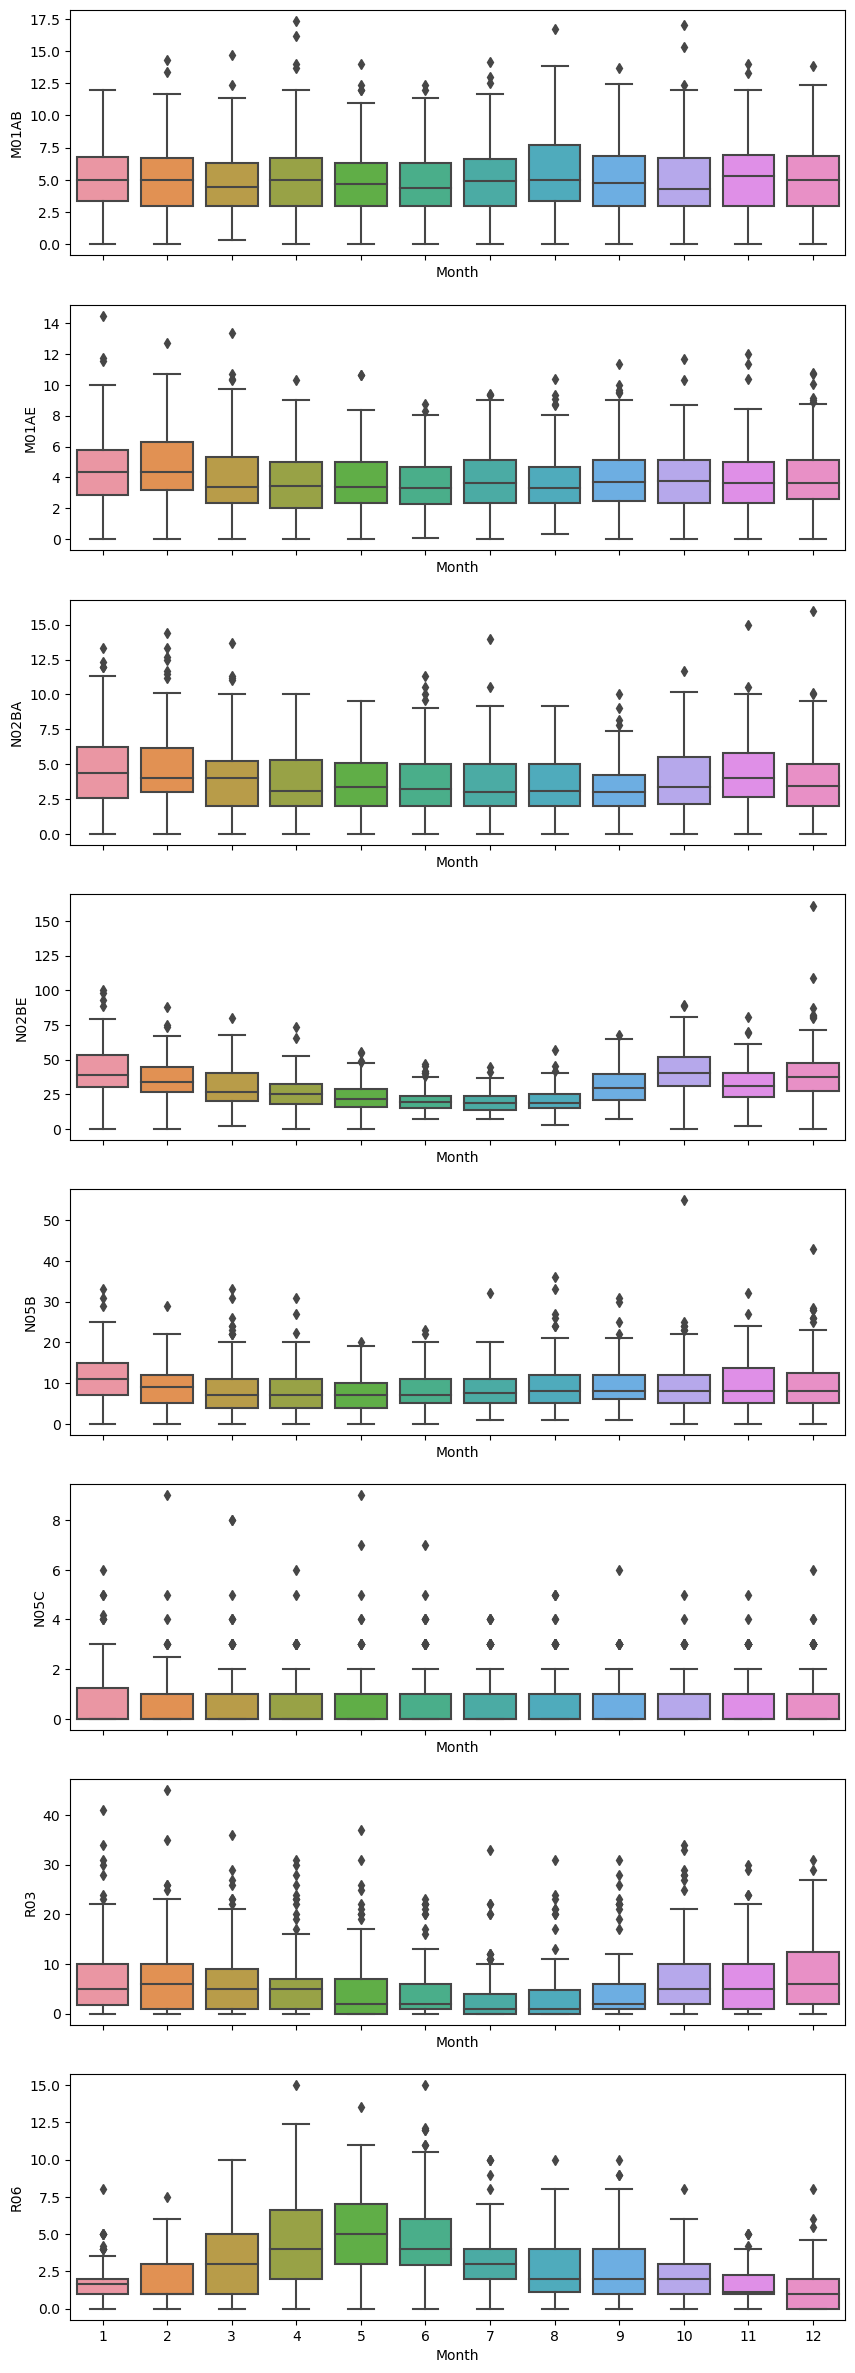

In [3]:
import seaborn as sns
dfatc_daily = pd.read_csv('salesdaily.csv')
fig, axes = plt.subplots(8, 1, figsize=(10, 30), sharex=True)
for name, ax in zip(['M01AB','M01AE','N02BA','N02BE', 'N05B','N05C','R03','R06'], axes):
    sns.boxplot(data=dfatc_daily, x='Month', y=name, ax=ax)

Below, boxplots on a weekly scale are shown, for the purpose of exploring the weakly seasonality. Some weekly seasonality is visible.

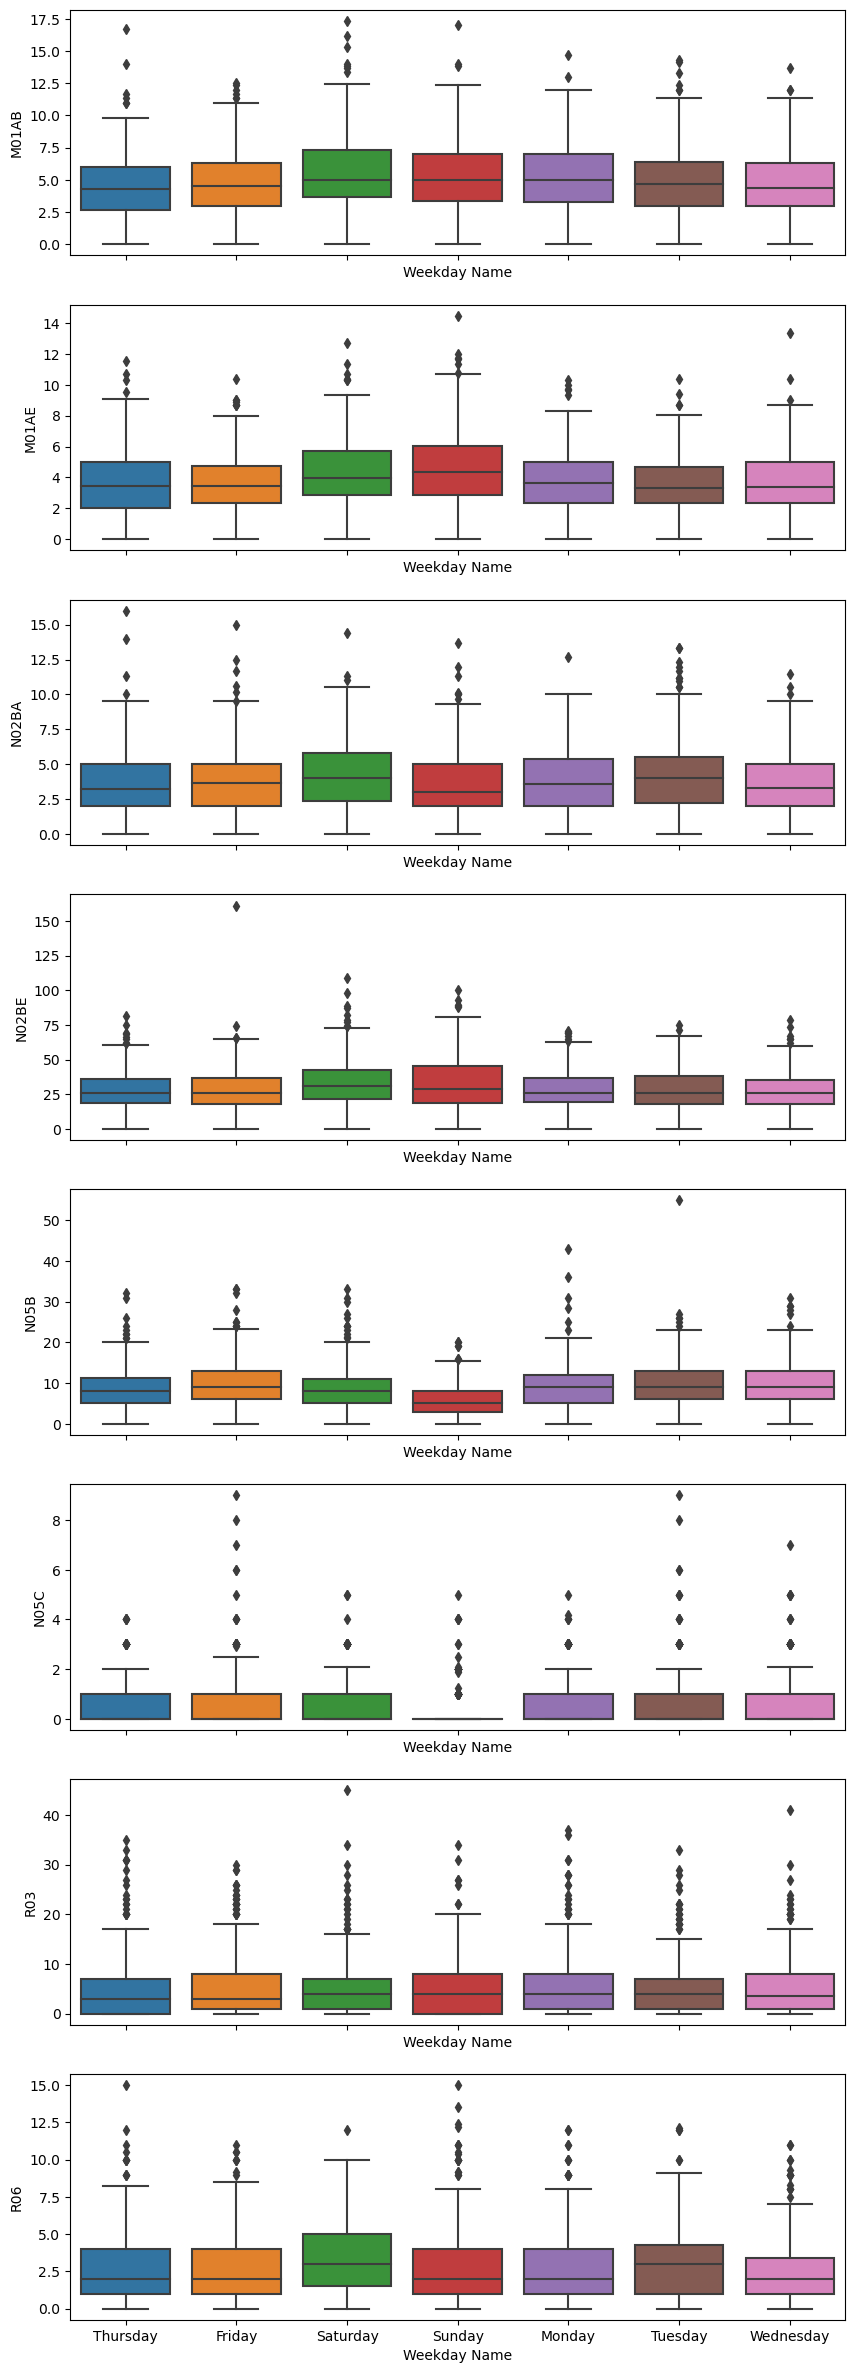

In [4]:
fig, axes = plt.subplots(8, 1, figsize=(10, 30), sharex=True)
for name, ax in zip(['M01AB','M01AE','N02BA','N02BE', 'N05B','N05C','R03','R06'], axes):
    sns.boxplot(data=dfatc_daily, x='Weekday Name', y=name, ax=ax)

Another visualization that can be useful for discovering seasonality patterns is related to rolling window means. Rolling window operations are another important transformation for time series data. Similar to downsampling, rolling windows split the data into time windows and the data in each window is aggregated with a function such as mean(), median(), sum(), etc. However, unlike downsampling, where the time bins do not overlap and the output is at a lower frequency than the input, rolling windows overlap and "roll" along at the same frequency as the data, so the transformed time series is at the same frequency as the original time series. That means also that the curve is smoother. Time series data often exhibit some slow, gradual variability in addition to higher frequency variability such as seasonality and noise. An easy way to visualize these trends is with rolling means at larger time scales. Analysis below shows 30-day and 365-day rolling mean and 30-day rolling standard deviation of sales data.

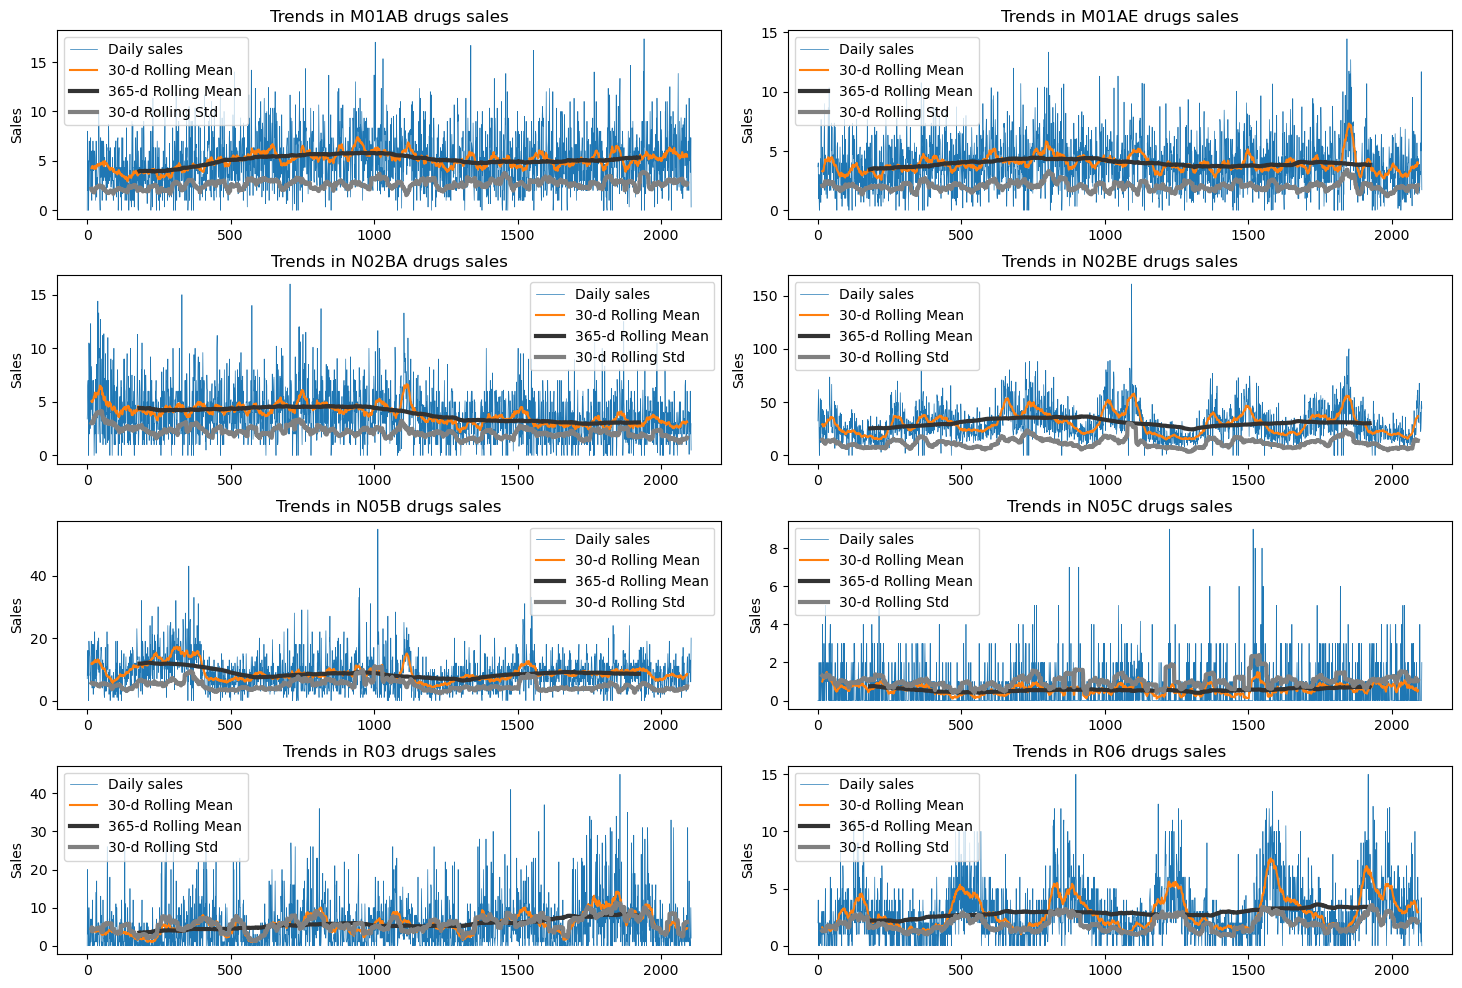

In [5]:
# dfatc_daily=pd.read_csv('../input/salesdaily.csv')
cols_plot = ['M01AB','M01AE','N02BA','N02BE', 'N05B','N05C','R03','R06']
dfatc_365d = dfatc_daily[cols_plot].rolling(window=365, center=True).mean()
dfatc_30d = dfatc_daily[cols_plot].rolling(30, center=True).mean()
dfatc_std = dfatc_daily[cols_plot].rolling(30, center=True).std()
subplotindex=0
numrows=4
numcols=2
fig, ax = plt.subplots(numrows, numcols, figsize=(18, 12))
plt.subplots_adjust(wspace=0.1, hspace=0.3)

for x in cols_plot:
    rowindex=math.floor(subplotindex/numcols)
    colindex=subplotindex-(rowindex*numcols)
    ax[rowindex,colindex].plot(dfatc_daily.loc[:,x], linewidth=0.5, label='Daily sales')
    ax[rowindex,colindex].plot(dfatc_30d.loc[:,x], label='30-d Rolling Mean')
    ax[rowindex,colindex].plot(dfatc_365d.loc[:,x], color='0.2', linewidth=3, label='365-d Rolling Mean')
    ax[rowindex,colindex].plot(dfatc_std.loc[:,x], color='0.5', linewidth=3, label='30-d Rolling Std')
    ax[rowindex,colindex].set_ylabel('Sales')
    ax[rowindex,colindex].legend()
    ax[rowindex,colindex].set_title('Trends in '+x+' drugs sales');
    subplotindex=subplotindex+1
plt.show()

Image below shows trends for each of the drug categories, represented by the 365-d rolling means for each of those categories.

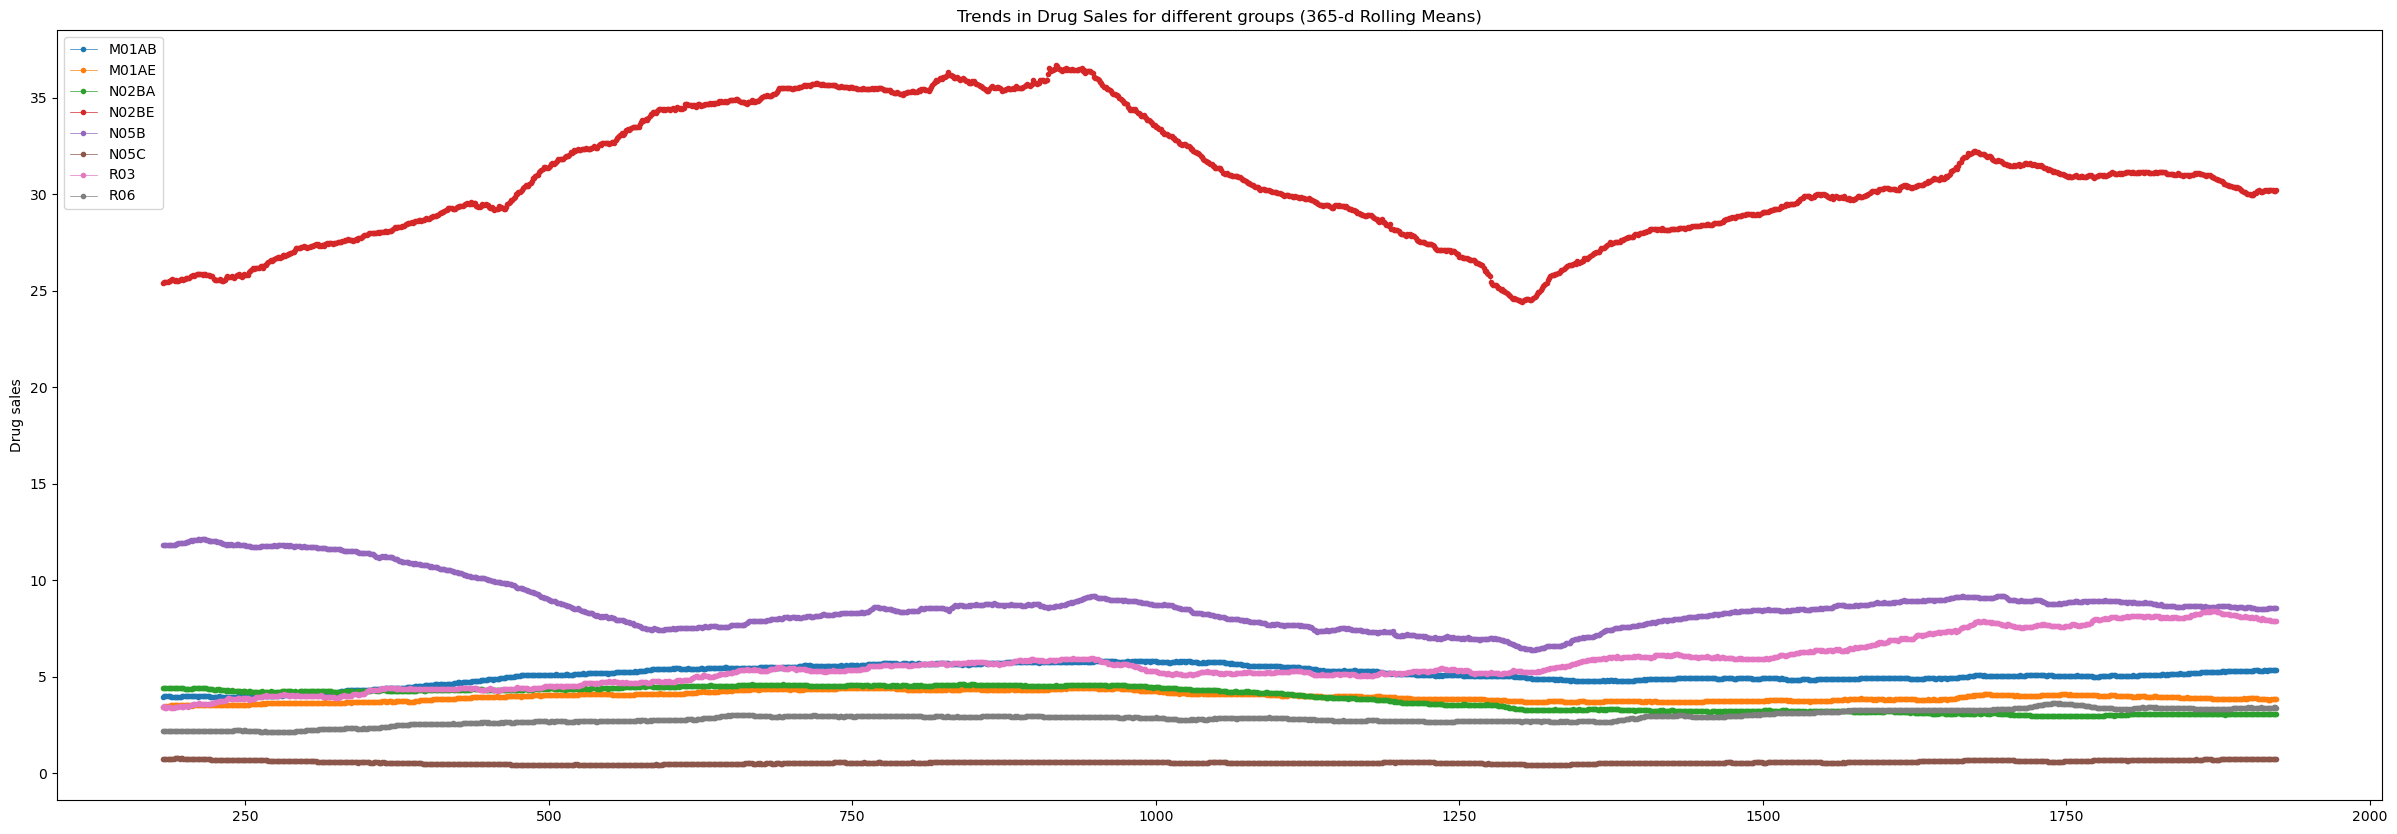

In [6]:
fig, ax = plt.subplots(figsize=(30, 10))
for nm in cols_plot:
    ax.plot(dfatc_365d[nm], label=nm, marker='.', linestyle='-', linewidth=0.5)
    ax.legend()
    ax.set_ylabel('Drug sales')
    ax.set_title('Trends in Drug Sales for different groups (365-d Rolling Means)');

Trends and seasonality can be explored in time series decomposition view, based on 30d rolling means.

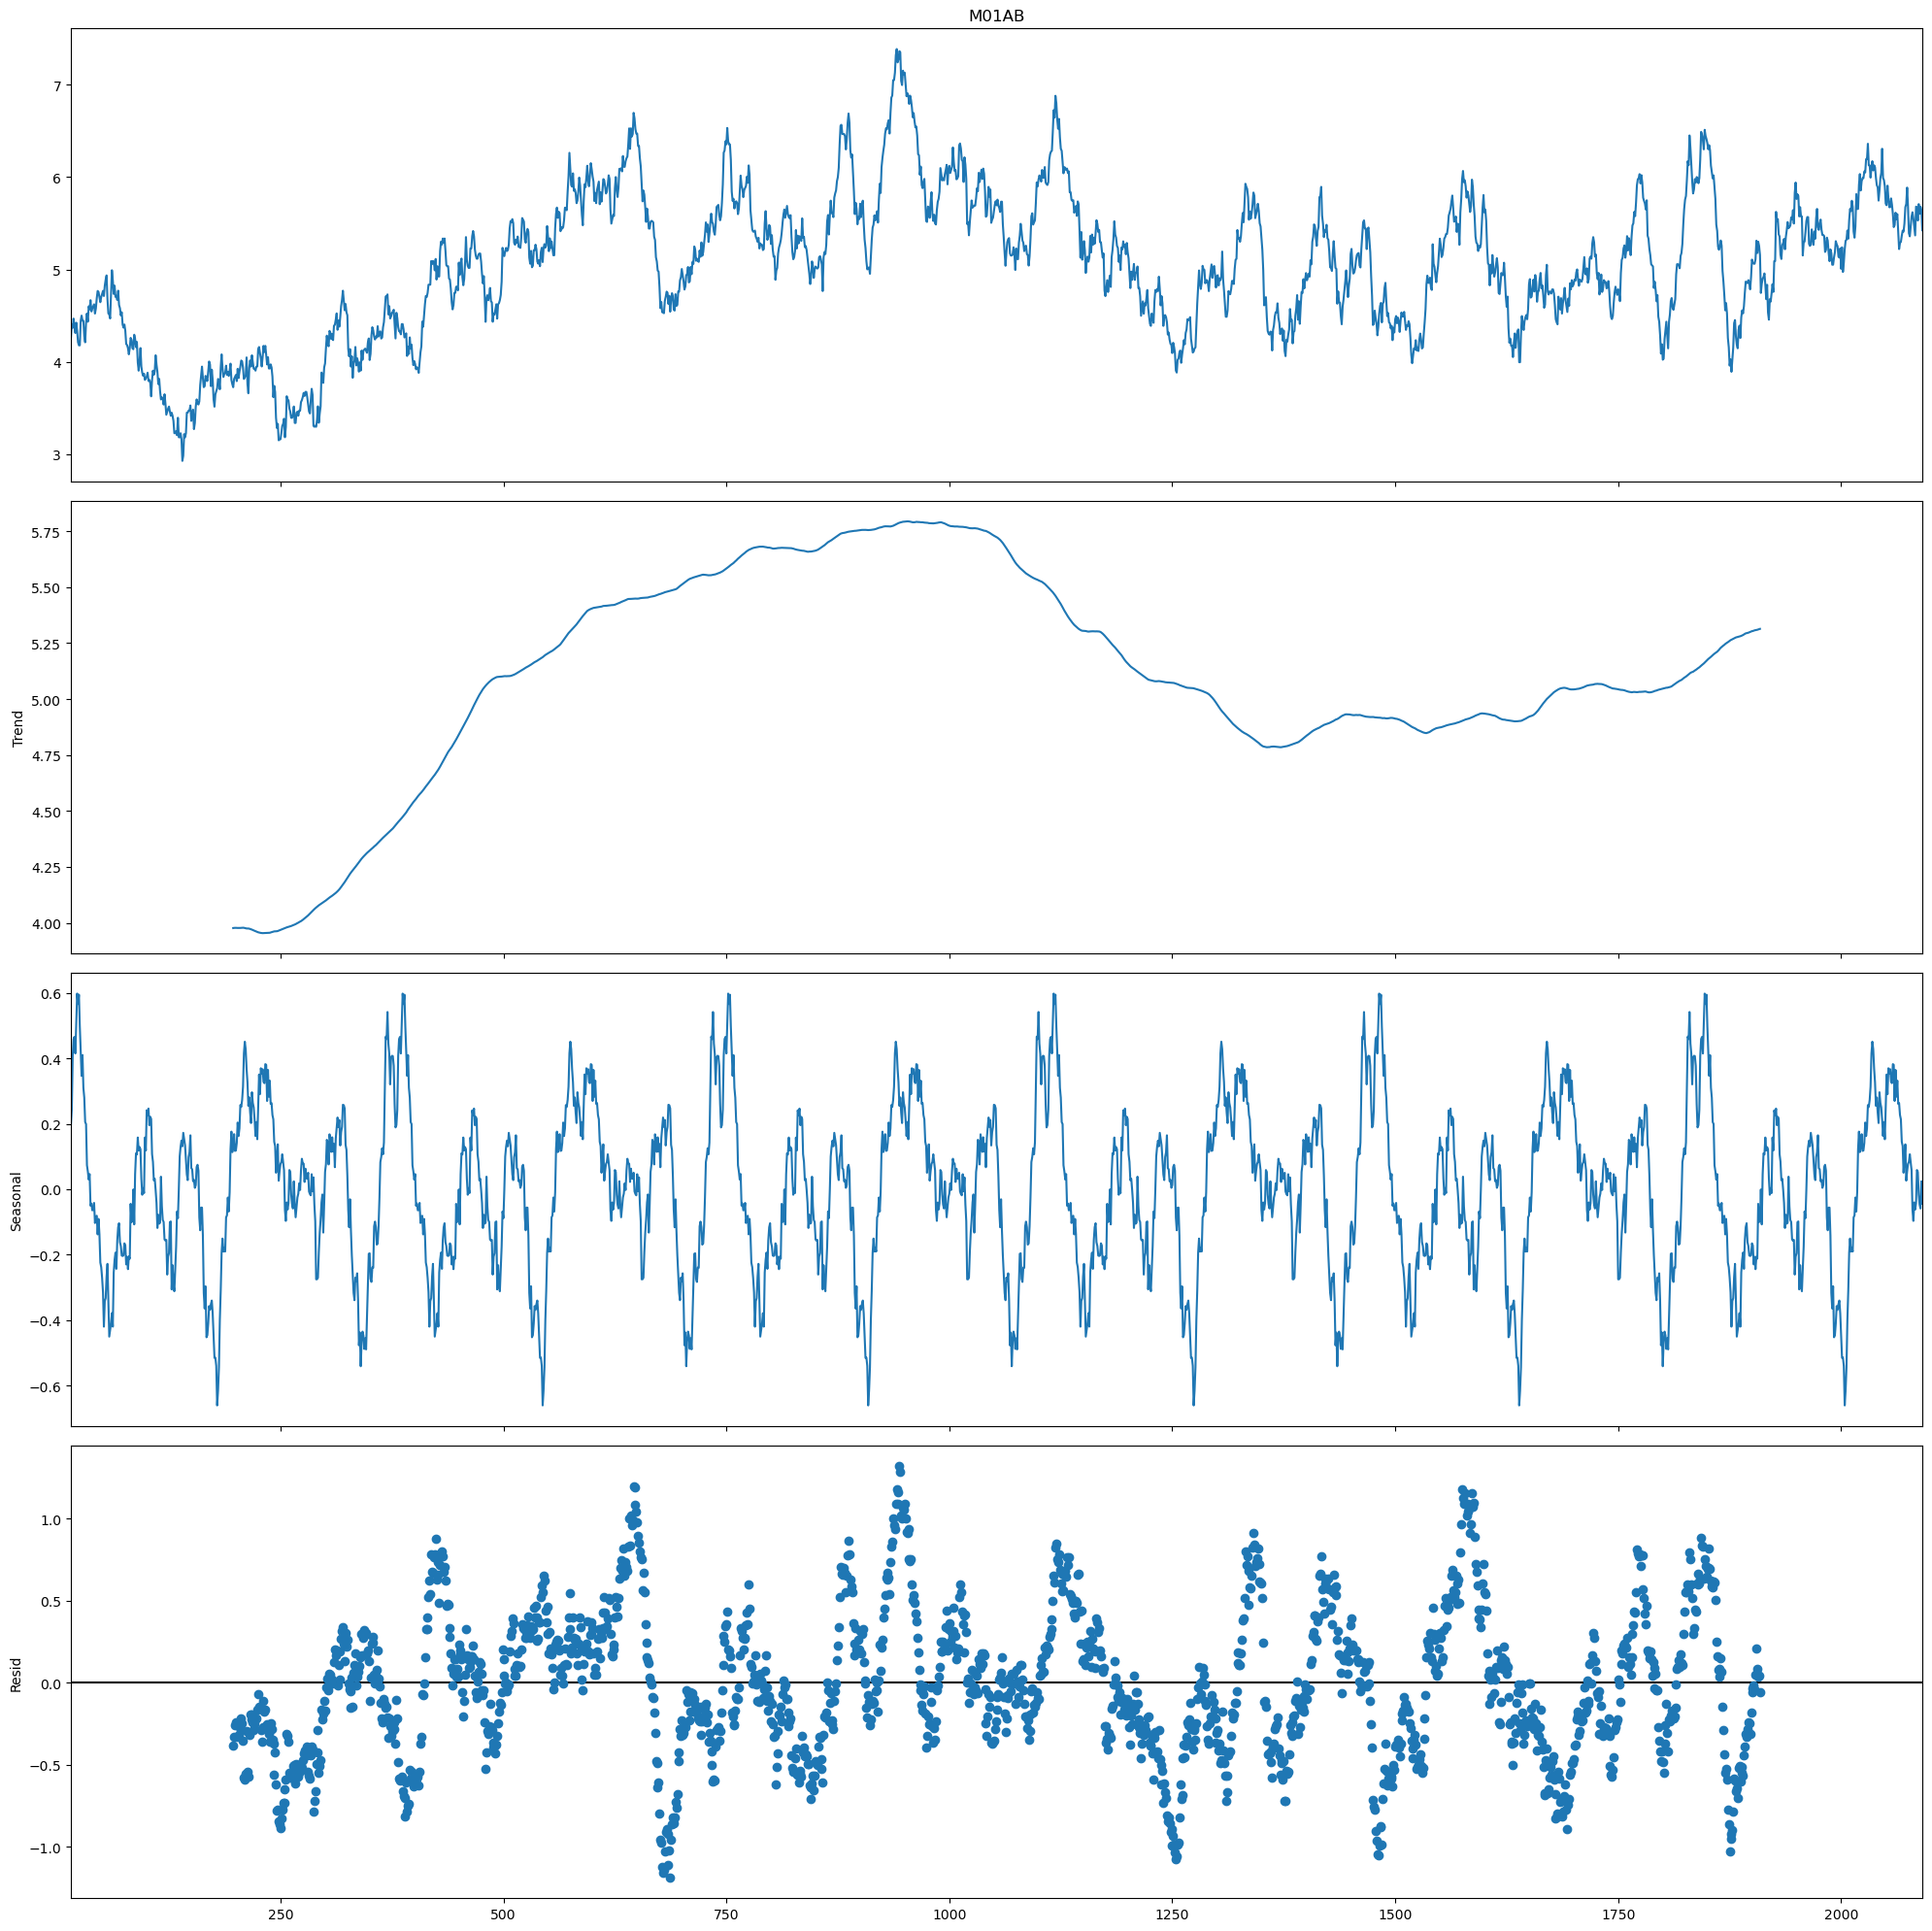

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(dfatc_daily['M01AB'].rolling(30, center=True).mean().dropna(), period=365, filt=None)
plt.rcParams["figure.figsize"] = (20,20)
result.plot()
plt.show()

Function seasonal_decompose can be used for analysis of the portions of each component of time series. This is especially useful when determining uptake of residuals in data, based on the decomposed data. The volume of this uptake implies the predictability of the time series - higher the residuals, lower the predictability. To some extent, the proportion of the residuals when comparing with trend and seasonality can be also illustrated by the rolling means and standard deviation plots above.

In [8]:
df = pd.read_csv('salesweekly.csv')
for x in ['M01AB','M01AE','N02BA','N02BE','N05B','N05C','R03','R06']:
    result = seasonal_decompose(df[x], period=52, model='additive')
    dfs = pd.concat([result.trend, result.seasonal, result.resid, result.observed], axis=1)
    dfs.columns = ['trend', 'seasonal', 'residuals', 'observed']
    dfs=dfs.dropna()
    res=dfs['residuals'].values
    obs=dfs['observed'].values
    resmean=np.mean(np.abs(res))
    obsmean=np.mean(np.abs(obs))
    perc=resmean*100/obsmean
    print(x+' RESMEAN:'+str(resmean)+', OBSMEAN:'+str(obsmean)+', PERC:'+str(perc)+'%')

M01AB RESMEAN:5.267159962841151, OBSMEAN:35.59490833332001, PERC:14.79750955815953%
M01AE RESMEAN:4.319542609675869, OBSMEAN:28.00801458336, PERC:15.422523423856601%
N02BA RESMEAN:3.9228389592521657, OBSMEAN:27.083016, PERC:14.484498178682042%
N02BE RESMEAN:29.534357236963668, OBSMEAN:217.6597028336, PERC:13.569051529737028%
N05B RESMEAN:12.94840305932125, OBSMEAN:61.96614999972, PERC:20.895929566997072%
N05C RESMEAN:2.0384606385595405, OBSMEAN:3.871833333332, PERC:52.648460382081936%
R03 RESMEAN:11.72224433554451, OBSMEAN:40.06845833336, PERC:29.255541199060463%
R06 RESMEAN:4.278758416393868, OBSMEAN:19.744589999960002, PERC:21.67053565762842%


### 4.2.2. Stationarity analysis

Stationarity of time-series is the property of exhibiting constant statistical properties over time (for example, mean, variance, autocorrelation). It can be visually determined by plotting rolling statistics (rolling means and variances). In stationary time series, the mean of the series, variance of the series and covariance of the i th term and the (i + m) th term should not be a function of time.

We can use Augmented Dickey-Fuller (ADF) test to check stationarity of the data. Possible values of regression parameters of ADF are:
- c : constant only (default)
- ct : constant and trend
- ctt : constant, and linear and quadratic trend
- nc : no constant, no trend

In [9]:
df=pd.read_csv('salesweekly.csv')
from statsmodels.tsa.stattools import adfuller

for x in ['M01AB','M01AE','N02BA','N02BE', 'N05B','N05C','R03','R06']:
    dftest = adfuller(df[x], regression='ct', autolag='AIC')
    print("ADF test for "+x)
    print("-----------------------------")
    print("Test statistic = {:.3f}".format(dftest[0]))
    print("P-value = {:.3f}".format(dftest[1]))
    print("Critical values :")
    for k, v in dftest[4].items():
        print("\t{}: {} - The data is {} stationary with {}% confidence".format(k, v, "not" if v<dftest[0] else "", 100-int(k[:-1])))

ADF test for M01AB
-----------------------------
Test statistic = -3.700
P-value = 0.022
Critical values :
	1%: -3.9897903649837616 - The data is not stationary with 99% confidence
	5%: -3.425478311521626 - The data is  stationary with 95% confidence
	10%: -3.1358607194990724 - The data is  stationary with 90% confidence
ADF test for M01AE
-----------------------------
Test statistic = -8.717
P-value = 0.000
Critical values :
	1%: -3.98926783537037 - The data is  stationary with 99% confidence
	5%: -3.425226747185185 - The data is  stationary with 95% confidence
	10%: -3.1357131066666666 - The data is  stationary with 90% confidence
ADF test for N02BA
-----------------------------
Test statistic = -2.670
P-value = 0.249
Critical values :
	1%: -3.990441532957606 - The data is not stationary with 99% confidence
	5%: -3.425791763669738 - The data is not stationary with 95% confidence
	10%: -3.1360446341572343 - The data is not stationary with 90% confidence
ADF test for N02BE
------------

Augmented Dickey-Fuller (ADF) test have shown that all data, but N02BA (P-value=0.249) in the series were stationary, with maximum confidence.

In [10]:
import pandas as pd

# Load your CSV file into a DataFrame
df = pd.read_csv('salesweekly.csv')

# Now you can use df.head() to view the first few rows
print(df.head())

       datum  M01AB  M01AE  N02BA   N02BE  N05B  N05C   R03   R06
0   1/5/2014  14.00  11.67   21.3  185.95  41.0   0.0  32.0   7.0
1  1/12/2014  29.33  12.68   37.9  190.70  88.0   5.0  21.0   7.2
2  1/19/2014  30.67  26.34   45.9  218.40  80.0   8.0  29.0  12.0
3  1/26/2014  34.00  32.37   31.5  179.60  80.0   8.0  23.0  10.0
4   2/2/2014  31.02  23.35   20.7  159.88  84.0  12.0  29.0  12.0


In [11]:
print(df.describe())


            M01AB       M01AE       N02BA       N02BE        N05B        N05C  \
count  302.000000  302.000000  302.000000  302.000000  302.000000  302.000000   
mean    35.102441   27.167611   27.060295  208.627161   61.740853    4.138935   
std      8.617106    7.043491    8.086458   76.069221   22.436970    3.129265   
min      7.670000    6.237000    3.500000   86.250000   18.000000    0.000000   
25%     29.387500   22.387500   21.300000  149.300000   47.000000    2.000000   
50%     34.565000   26.789500   26.500000  198.300000   57.000000    3.979167   
75%     40.175000   31.046500   32.475000  252.471500   71.000000    6.000000   
max     65.330000   53.571000   60.125000  546.899000  154.000000   17.000000   

              R03         R06  
count  302.000000  302.000000  
mean    38.439811   20.224561  
std     22.900873   11.381464  
min      2.000000    1.000000  
25%     21.000000   11.475000  
50%     35.000000   17.500000  
75%     51.000000   26.000000  
max    131.000

In [12]:
print(df.isna())

     datum  M01AB  M01AE  N02BA  N02BE   N05B   N05C    R03    R06
0    False  False  False  False  False  False  False  False  False
1    False  False  False  False  False  False  False  False  False
2    False  False  False  False  False  False  False  False  False
3    False  False  False  False  False  False  False  False  False
4    False  False  False  False  False  False  False  False  False
..     ...    ...    ...    ...    ...    ...    ...    ...    ...
297  False  False  False  False  False  False  False  False  False
298  False  False  False  False  False  False  False  False  False
299  False  False  False  False  False  False  False  False  False
300  False  False  False  False  False  False  False  False  False
301  False  False  False  False  False  False  False  False  False

[302 rows x 9 columns]


In [13]:
print(df.dtypes)


datum     object
M01AB    float64
M01AE    float64
N02BA    float64
N02BE    float64
N05B     float64
N05C     float64
R03      float64
R06      float64
dtype: object


In [14]:
correlation_matrix = df.corr()
df.corr()

M01AB     M01AE     N02BA     N02BE      N05B      N05C       R03  \
M01AB  1.000000  0.251574  0.165271  0.212462 -0.062916  0.001628  0.145984   
M01AE  0.251574  1.000000  0.241872  0.424185  0.094238  0.032409  0.221023   
N02BA  0.165271  0.241872  1.000000  0.324098  0.300877  0.092970 -0.021493   
N02BE  0.212462  0.424185  0.324098  1.000000  0.127111  0.082989  0.446968   
N05B  -0.062916  0.094238  0.300877  0.127111  1.000000  0.279640  0.034152   
N05C   0.001628  0.032409  0.092970  0.082989  0.279640  1.000000  0.138947   
R03    0.145984  0.221023 -0.021493  0.446968  0.034152  0.138947  1.000000   
R06    0.098144 -0.089384 -0.184593 -0.417905 -0.205082 -0.095079 -0.090285   

            R06  
M01AB  0.098144  
M01AE -0.089384  
N02BA -0.184593  
N02BE -0.417905  
N05B  -0.205082  
N05C  -0.095079  
R03   -0.090285  
R06    1.000000

In [15]:
from statsmodels.tsa.stattools import kpss
warnings.filterwarnings("ignore")
df=pd.read_csv('salesweekly.csv')
print(df)

          datum  M01AB   M01AE  N02BA    N02BE  N05B  N05C        R03    R06
0      1/5/2014  14.00  11.670  21.30  185.950  41.0   0.0  32.000000   7.00
1     1/12/2014  29.33  12.680  37.90  190.700  88.0   5.0  21.000000   7.20
2     1/19/2014  30.67  26.340  45.90  218.400  80.0   8.0  29.000000  12.00
3     1/26/2014  34.00  32.370  31.50  179.600  80.0   8.0  23.000000  10.00
4      2/2/2014  31.02  23.350  20.70  159.880  84.0  12.0  29.000000  12.00
..          ...    ...     ...    ...      ...   ...   ...        ...    ...
297   9/15/2019  35.51  30.977  19.65  178.375  67.2   5.0  30.000000  30.50
298   9/22/2019  46.84  25.396  24.40  248.250  31.2   3.0  26.000000  21.00
299   9/29/2019  34.01  22.498  26.60  336.700  61.2   1.0  40.416667  23.10
300   10/6/2019  38.70  32.502  19.25  249.450  69.0   5.0  30.000000  12.13
301  10/13/2019   7.67   6.237   3.50   95.100  26.0   2.0  12.000000   1.00

[302 rows x 9 columns]


In [16]:
A = df.dropna()  # Remove rows with NaN values
A

datum  M01AB   M01AE  N02BA    N02BE  N05B  N05C        R03    R06
0      1/5/2014  14.00  11.670  21.30  185.950  41.0   0.0  32.000000   7.00
1     1/12/2014  29.33  12.680  37.90  190.700  88.0   5.0  21.000000   7.20
2     1/19/2014  30.67  26.340  45.90  218.400  80.0   8.0  29.000000  12.00
3     1/26/2014  34.00  32.370  31.50  179.600  80.0   8.0  23.000000  10.00
4      2/2/2014  31.02  23.350  20.70  159.880  84.0  12.0  29.000000  12.00
..          ...    ...     ...    ...      ...   ...   ...        ...    ...
297   9/15/2019  35.51  30.977  19.65  178.375  67.2   5.0  30.000000  30.50
298   9/22/2019  46.84  25.396  24.40  248.250  31.2   3.0  26.000000  21.00
299   9/29/2019  34.01  22.498  26.60  336.700  61.2   1.0  40.416667  23.10
300   10/6/2019  38.70  32.502  19.25  249.450  69.0   5.0  30.000000  12.13
301  10/13/2019   7.67   6.237   3.50   95.100  26.0   2.0  12.000000   1.00

[302 rows x 9 columns]

In [17]:
df['R03'] = df['R03'].round().astype(int)
df

datum  M01AB   M01AE  N02BA    N02BE  N05B  N05C  R03    R06
0      1/5/2014  14.00  11.670  21.30  185.950  41.0   0.0   32   7.00
1     1/12/2014  29.33  12.680  37.90  190.700  88.0   5.0   21   7.20
2     1/19/2014  30.67  26.340  45.90  218.400  80.0   8.0   29  12.00
3     1/26/2014  34.00  32.370  31.50  179.600  80.0   8.0   23  10.00
4      2/2/2014  31.02  23.350  20.70  159.880  84.0  12.0   29  12.00
..          ...    ...     ...    ...      ...   ...   ...  ...    ...
297   9/15/2019  35.51  30.977  19.65  178.375  67.2   5.0   30  30.50
298   9/22/2019  46.84  25.396  24.40  248.250  31.2   3.0   26  21.00
299   9/29/2019  34.01  22.498  26.60  336.700  61.2   1.0   40  23.10
300   10/6/2019  38.70  32.502  19.25  249.450  69.0   5.0   30  12.13
301  10/13/2019   7.67   6.237   3.50   95.100  26.0   2.0   12   1.00

[302 rows x 9 columns]

In [18]:
df = df.fillna(0)
df

datum  M01AB   M01AE  N02BA    N02BE  N05B  N05C  R03    R06
0      1/5/2014  14.00  11.670  21.30  185.950  41.0   0.0   32   7.00
1     1/12/2014  29.33  12.680  37.90  190.700  88.0   5.0   21   7.20
2     1/19/2014  30.67  26.340  45.90  218.400  80.0   8.0   29  12.00
3     1/26/2014  34.00  32.370  31.50  179.600  80.0   8.0   23  10.00
4      2/2/2014  31.02  23.350  20.70  159.880  84.0  12.0   29  12.00
..          ...    ...     ...    ...      ...   ...   ...  ...    ...
297   9/15/2019  35.51  30.977  19.65  178.375  67.2   5.0   30  30.50
298   9/22/2019  46.84  25.396  24.40  248.250  31.2   3.0   26  21.00
299   9/29/2019  34.01  22.498  26.60  336.700  61.2   1.0   40  23.10
300   10/6/2019  38.70  32.502  19.25  249.450  69.0   5.0   30  12.13
301  10/13/2019   7.67   6.237   3.50   95.100  26.0   2.0   12   1.00

[302 rows x 9 columns]

In [19]:
# from statsmodels.tsa.stattools import kpss

# columns_to_check = ['M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03', 'R06']

# stationary_results = []
# for x in columns_to_check:
#     dftest = kpss(df[x].apply(lambda x: np.log(x)), 'ct')
#     if dftest[1] < 0.05:
#         stationary_results.append(f"{x} - no data stationary")
#     else:
#         stationary_results.append(f"{x} - data stationary")

# stationary_message = " | ".join(stationary_results)

# print("Data Stationarity Results:")
# print(stationary_message)


In [20]:
nan_count = df['N05C'].isna().sum()
print(f"Number of NaN values in 'N05C': {nan_count}")

Number of NaN values in 'N05C': 0


In [21]:
df['N05C'] = df['N05C'].fillna(np.nan).astype(int)
df

datum  M01AB   M01AE  N02BA    N02BE  N05B  N05C  R03    R06
0      1/5/2014  14.00  11.670  21.30  185.950  41.0     0   32   7.00
1     1/12/2014  29.33  12.680  37.90  190.700  88.0     5   21   7.20
2     1/19/2014  30.67  26.340  45.90  218.400  80.0     8   29  12.00
3     1/26/2014  34.00  32.370  31.50  179.600  80.0     8   23  10.00
4      2/2/2014  31.02  23.350  20.70  159.880  84.0    12   29  12.00
..          ...    ...     ...    ...      ...   ...   ...  ...    ...
297   9/15/2019  35.51  30.977  19.65  178.375  67.2     5   30  30.50
298   9/22/2019  46.84  25.396  24.40  248.250  31.2     3   26  21.00
299   9/29/2019  34.01  22.498  26.60  336.700  61.2     1   40  23.10
300   10/6/2019  38.70  32.502  19.25  249.450  69.0     5   30  12.13
301  10/13/2019   7.67   6.237   3.50   95.100  26.0     2   12   1.00

[302 rows x 9 columns]

In [22]:
df['N05C'] = df['N05C'].replace(0, 1)
df

datum  M01AB   M01AE  N02BA    N02BE  N05B  N05C  R03    R06
0      1/5/2014  14.00  11.670  21.30  185.950  41.0     1   32   7.00
1     1/12/2014  29.33  12.680  37.90  190.700  88.0     5   21   7.20
2     1/19/2014  30.67  26.340  45.90  218.400  80.0     8   29  12.00
3     1/26/2014  34.00  32.370  31.50  179.600  80.0     8   23  10.00
4      2/2/2014  31.02  23.350  20.70  159.880  84.0    12   29  12.00
..          ...    ...     ...    ...      ...   ...   ...  ...    ...
297   9/15/2019  35.51  30.977  19.65  178.375  67.2     5   30  30.50
298   9/22/2019  46.84  25.396  24.40  248.250  31.2     3   26  21.00
299   9/29/2019  34.01  22.498  26.60  336.700  61.2     1   40  23.10
300   10/6/2019  38.70  32.502  19.25  249.450  69.0     5   30  12.13
301  10/13/2019   7.67   6.237   3.50   95.100  26.0     2   12   1.00

[302 rows x 9 columns]

In [23]:
for x in ['M01AB','M01AE','N02BA','N02BE', 'N05B','N05C', 'R03', 'R06']:
    print(" > Is "+x+" data stationary ?")

    data = df[x].fillna(0)
    # .astype(float)
    log_data = np.log(data)
    print(log_data)
    dftest = kpss(log_data, 'ct')
    print(dftest)

    # dftest = kpss(np.log(df[x]), 'ct')

 > Is M01AB data stationary ?
0      2.639057
1      3.378611
2      3.423285
3      3.526361
4      3.434632
         ...   
297    3.569814
298    3.846738
299    3.526655
300    3.655840
301    2.037317
Name: M01AB, Length: 302, dtype: float64
(0.46906155974186603, 0.01, 7, {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216})
 > Is M01AE data stationary ?
0      2.457021
1      2.540026
2      3.271089
3      3.477232
4      3.150597
         ...   
297    3.433245
298    3.234592
299    3.113426
300    3.481302
301    1.830499
Name: M01AE, Length: 302, dtype: float64
(0.34673792712883356, 0.01, 6, {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216})
 > Is N02BA data stationary ?
0      3.058707
1      3.634951
2      3.826465
3      3.449988
4      3.030134
         ...   
297    2.978077
298    3.194583
299    3.280911
300    2.957511
301    1.252763
Name: N02BA, Length: 302, dtype: float64
(0.23296996962459704, 0.01, 6, {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.2

In [24]:


    print("Test statistic = {:.3f}".format(dftest[0]))
    print("P-value = {:.3f}".format(dftest[1]))
    print("Critical values :")
    for k, v in dftest[3].items():
        print("\t{}: {}".format(k, v))

Test statistic = 0.032
P-value = 0.100
Critical values :
	10%: 0.119
	5%: 0.146
	2.5%: 0.176
	1%: 0.216


Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test found the trend non-stationarity in N02BE, R03 and R06.

### 4.2.3. Regularity analysis

For calculating regularity and predictability of time series, Approximate Entropy test was used. For all series, entropy values were higher than 1 indicating low predictability, with highest values for M01AE, M01AB and N02BA.

In [25]:
df = pd.read_csv('salesweekly.csv')
def ApEn(U, m, r):
    def _maxdist(x_i, x_j):
        return max([abs(ua - va) for ua, va in zip(x_i, x_j)])
    def _phi(m):
        x = [[U[j] for j in range(i, i + m - 1 + 1)] for i in range(N - m + 1)]
        C = [len([1 for x_j in x if _maxdist(x_i, x_j) <= r]) / (N - m + 1.0) for x_i in x]
        return (N - m + 1.0)**(-1) * sum(np.log(C))
    N = len(U)
    return abs(_phi(m+1) - _phi(m))

for x in ['M01AB','M01AE','N02BA','N02BE','N05B','N05C','R03','R06']:
    print(x + ': ' + str(ApEn(df[x].values, m=2, r=0.2*np.std(df[x].values))))

M01AB: 1.141130089570642
M01AE: 1.166363924596575
N02BA: 1.1370638730125302
N02BE: 1.058024809082593
N05B: 1.074437415034502
N05C: 1.0361887401424648
R03: 1.1847216239035152
R06: 1.031759595747876


### 4.2.4. Autocorrelation analysis

Autocorrelation analysis illustrates the potential for time series data prediction. Autocorrelation plots graphically summarize the strength of a relationship with an observation in a time series with observations at prior time steps. Pearson coefficient is used to measure autocorrelation. Thus, the following analysis is relevant only for data with normal Gaussian distribution.

A plot of the autocorrelation of a time series by lag is called the AutoCorrelation Function (ACF). This plot is sometimes called a correlogram or an autocorrelation plot. Plot shows the lag value along the x-axis and the correlation on the y-axis between -1 and 1. Confidence intervals are drawn as a cone. By default, this is set to a 95% confidence interval, suggesting that correlation values outside of this code are very likely a correlation.

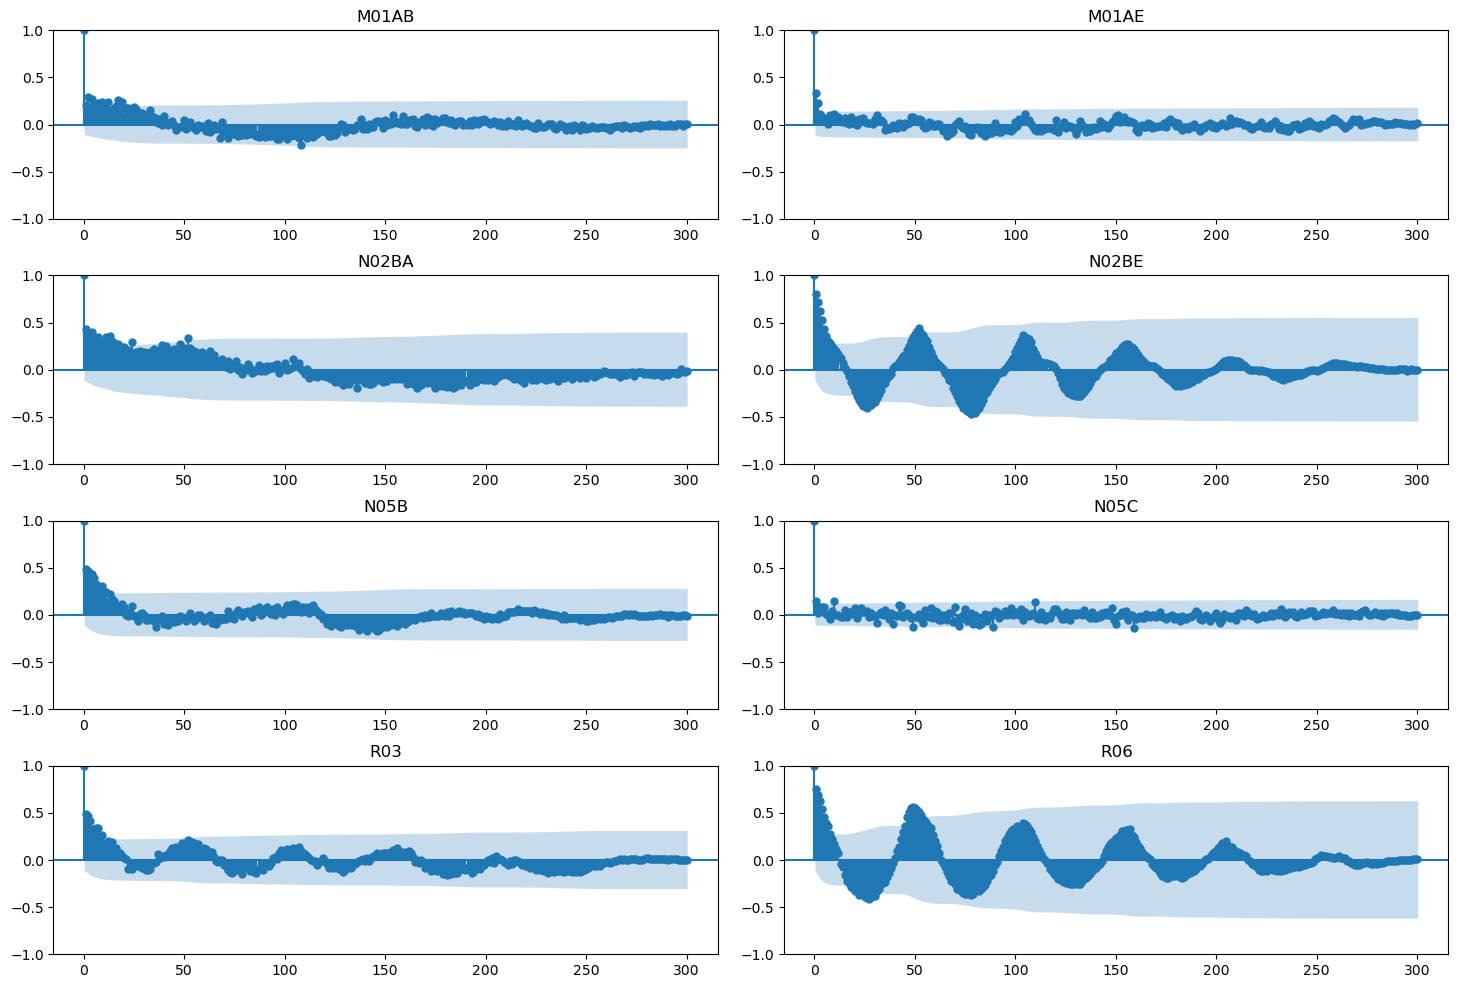

In [26]:
from statsmodels.graphics.tsaplots import plot_acf
df = pd.read_csv('salesweekly.csv')
subplotindex=0
numrows=4
numcols=2
fig, ax = plt.subplots(numrows, numcols, figsize=(18,12))
plt.subplots_adjust(wspace=0.1, hspace=0.3)
with plt.rc_context():
    plt.rc("figure", figsize=(18,12))
    for x in ['M01AB','M01AE','N02BA','N02BE', 'N05B','N05C','R03','R06']:
        rowindex=math.floor(subplotindex/numcols)
        colindex=subplotindex-(rowindex*numcols)
        plot_acf(df[x], lags=300, title=x, ax=ax[rowindex,colindex])
        subplotindex=subplotindex+1


In general, the "partial" correlation between two variables is the amount of correlation between them which is not explained by their mutual correlations with a specified set of other variables. For example, if we are regressing a variable Y on other variables X1, X2, and X3, the partial correlation between Y and X3 is the amount of correlation between Y and X3 that is not explained by their common correlations with X1 and X2.

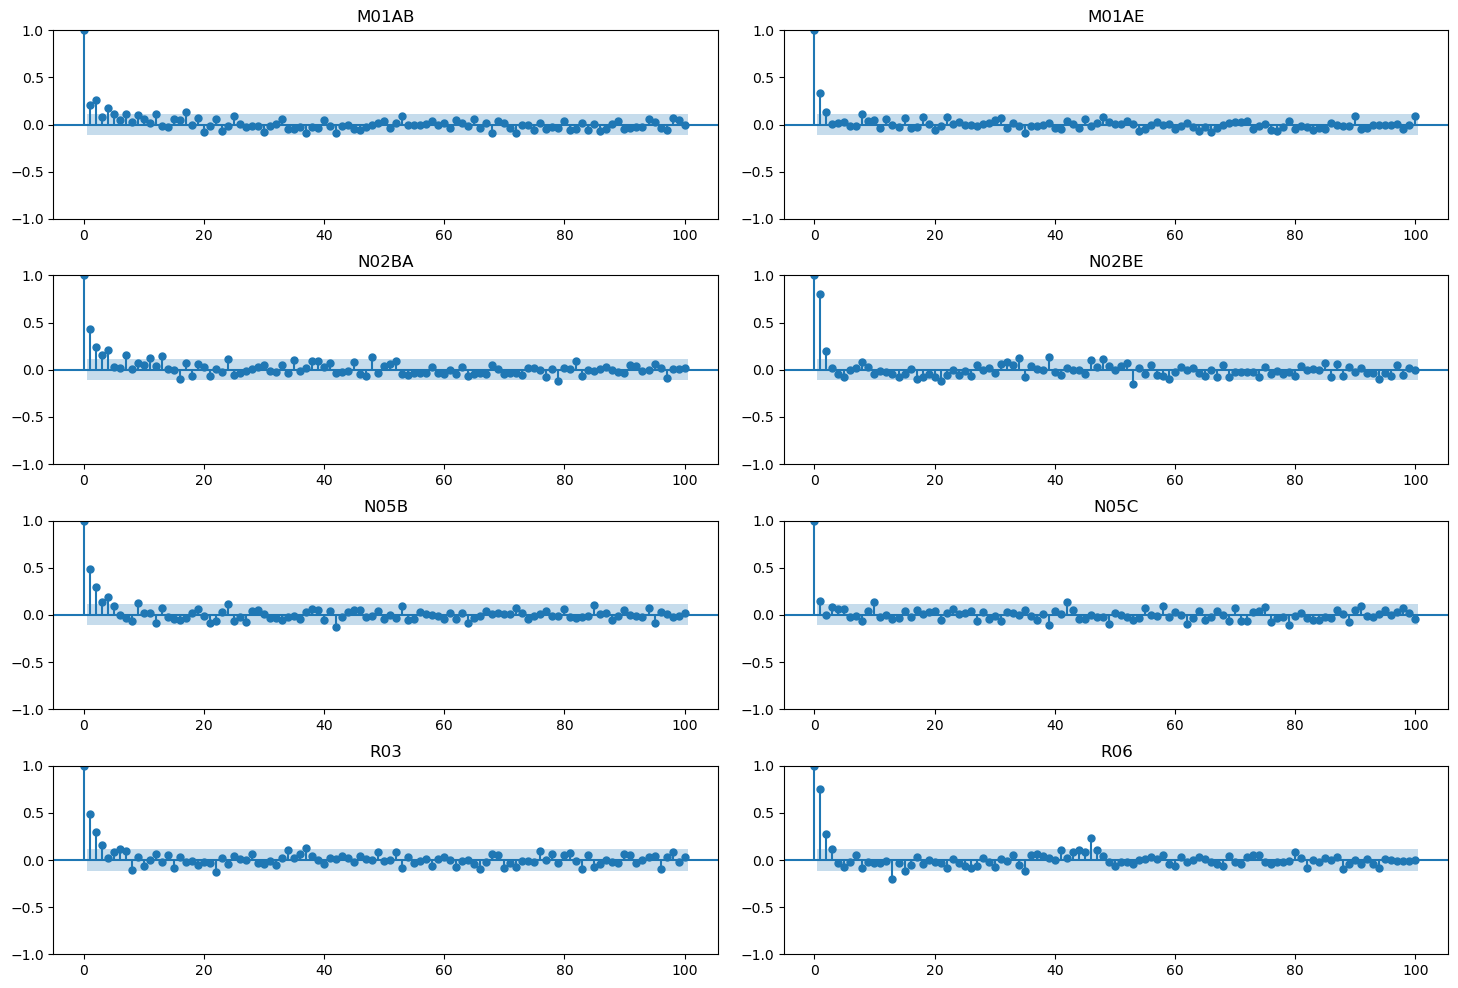

In [27]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
df = pd.read_csv('salesweekly.csv')
subplotindex=0
numrows=4
numcols=2
fig, ax = plt.subplots(numrows, numcols, figsize=(18,12))
plt.subplots_adjust(wspace=0.1, hspace=0.3)
with plt.rc_context():
    plt.rc("figure", figsize=(14,6))
    for x in ['M01AB','M01AE','N02BA','N02BE', 'N05B','N05C','R03','R06']:
        rowindex=math.floor(subplotindex/numcols)
        colindex=subplotindex-(rowindex*numcols)
        plot_pacf(df[x], lags=100, title=x, ax=ax[rowindex,colindex])
        subplotindex=subplotindex+1

Minor autocorrelation is observed at ACF (Auto-Correlation Function) and PACF (Partial Auto-Correlation Function) plots for all series, with exception of N05C sales. N02BE, R03 and R06 series were found to exhibit annual seasonality.

### 4.2.5. Data distribution analysis

Chart with daily sales for different categories of interest is shown below. N02BE and N05B charts, though showing the similar trends, are suppresed because of the larger scale which makes the other illustrations less readable.

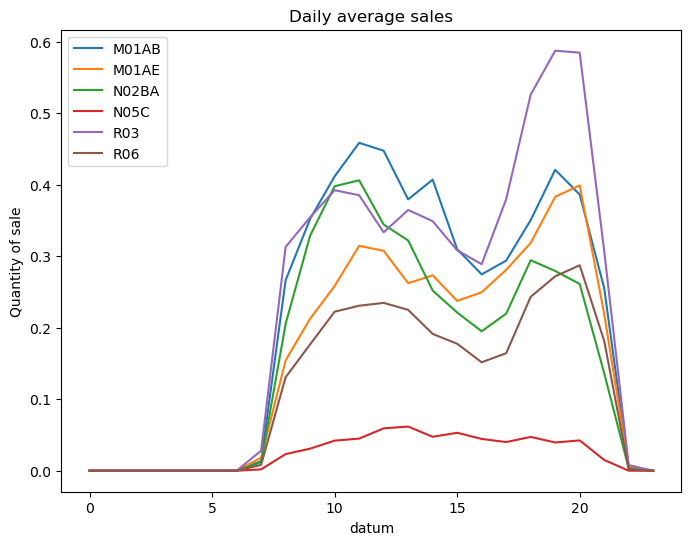

In [29]:
dfatch=pd.read_csv('saleshourly.csv')
dfatch['datum']= pd.to_datetime(dfatch['datum'])

grp1=dfatch.groupby(dfatch.datum.dt.hour)['M01AB'].mean()
grp2=dfatch.groupby(dfatch.datum.dt.hour)['M01AE'].mean()
grp3=dfatch.groupby(dfatch.datum.dt.hour)['N02BA'].mean()
grp6=dfatch.groupby(dfatch.datum.dt.hour)['N05C'].mean()
grp7=dfatch.groupby(dfatch.datum.dt.hour)['R03'].mean()
grp8=dfatch.groupby(dfatch.datum.dt.hour)['R06'].mean()

plt.title('Daily average sales')
plt.xlabel('Time of day')
plt.ylabel('Quantity of sale')

grp1.plot(figsize=(8,6))
grp2.plot(figsize=(8,6))
grp3.plot(figsize=(8,6))
grp6.plot(figsize=(8,6))
grp7.plot(figsize=(8,6))
grp8.plot(figsize=(8,6))

plt.legend(['M01AB', 'M01AE', 'N02BA', 'N05C', 'R03', 'R06'], loc='upper left')

plt.show()

Chart with weekly sales for different categories of interest was shown below. N02BE and N05B charts, though showing the similar trends, are suppresed because of the larger scale which makes the other illustrations less readable.

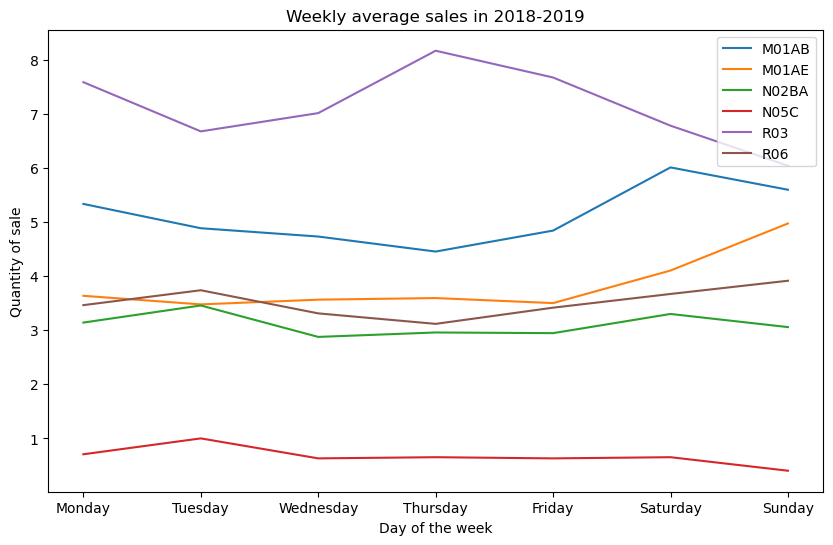

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
dfatcw = pd.read_csv('salesdaily.csv')

# Convert the 'datum' column to datetime
dfatcw['datum'] = pd.to_datetime(dfatcw['datum'])

# Define the days of the week
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Filter data for the year 2018 and onwards
filtered_df = dfatcw[dfatcw['datum'] > '2018-01-01']

# Group and calculate the mean for each product
grp1 = filtered_df.groupby(filtered_df['datum'].dt.day_name())['M01AB'].mean().reindex(days)
grp2 = filtered_df.groupby(filtered_df['datum'].dt.day_name())['M01AE'].mean().reindex(days)
grp3 = filtered_df.groupby(filtered_df['datum'].dt.day_name())['N02BA'].mean().reindex(days)
grp6 = filtered_df.groupby(filtered_df['datum'].dt.day_name())['N05C'].mean().reindex(days)
grp7 = filtered_df.groupby(filtered_df['datum'].dt.day_name())['R03'].mean().reindex(days)
grp8 = filtered_df.groupby(filtered_df['datum'].dt.day_name())['R06'].mean().reindex(days)

# Create the plots for each product
plt.figure(figsize=(10, 6))
grp1.plot()
grp2.plot()
grp3.plot()
grp6.plot()
grp7.plot()
grp8.plot()

# Add a legend
plt.legend(['M01AB', 'M01AE', 'N02BA', 'N05C', 'R03', 'R06'], loc='upper right')

# Set the title and labels
plt.title('Weekly average sales in 2018-2019')
plt.xlabel('Day of the week')
plt.ylabel('Quantity of sale')

# Show the plot
plt.show()


## 4.3. Time series forecasting

Forecasting models were fitted with weekly time-series data with dataset of 302 rows. Three forecasting methods were tested: ARIMA, Prophet and LSTM. Train-test split method was used (52 weeks of test data). MSE was used as metrics for comparing the performance and also as a loss function for LSTM. Mean Absolute Percentage Error (MAPE) is also measured for each of the scenarios. In order to define the baseline forecasting accuracy to improve from, three tests were performed. Average method was used as a baseline for long-term forecasting, while Naïve and Seasonal Naïve were used for rolling forecasts.

Forecasting results are validated by using two approaches: short-term and long-term forecasts. For short-term forecasts (or so-called rolling-forecast) validation or walk-forward model validation, train-test split validation is performed in iterative fashion, where observations are added to the training dataset after every individual weekly sales prediction, while the model is fitted in each iteration. Therefore, during testing, prediction in a timestep t is based on the model which fits the training set consisting of observations in timesteps (0,t-1), or: f(t) = f(o[0:t-1]). Long-term forecasts validation is based on MSE of one-year forecast, compared to actual observations.

All MSE metrics will be stored in a dataframe, which will be later use for presentation of the overall results and comparison. Rolling forecasting will be carried out by using 5 methods (Naive, Seasonal Naive, ARIMA, AutoARIMA, Prophet). Longterm forecasting will be carried out by using 7 methods (Average, ARIMA, AutoARIMA, Prophet, Vanilla LSTM, Stacked LSTM, Bidirectional LSTM).

In [31]:
resultsRolling={'M01AB':[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
     'M01AE':[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
     'N02BA':[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
     'N02BE':[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
     'N05B':[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
     'N05C':[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
     'R03':[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
     'R06':[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]}
resultsRollingdf = pd.DataFrame(resultsRolling)
resultsRollingdf.index = ['Naive MSE', 'Naive MAPE', 'Seasonal Naive MSE', 'Seasonal Naive MAPE',
                          'ARIMA MSE', 'ARIMA MAPE', 'AutoARIMA MSE', 'AutoARIMA MAPE',
                         'Prophet MSE', 'Prophet MAPE']
resultsLongterm={'M01AB':[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
     'M01AE':[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
     'N02BA':[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
     'N02BE':[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
     'N05B':[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
     'N05C':[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
     'R03':[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
     'R06':[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]}
resultsLongtermdf = pd.DataFrame(resultsLongterm)
resultsLongtermdf.index = ['Average MSE', 'Average MAPE', 'ARIMA MSE', 'ARIMA MAPE',
                           'AutoARIMA MSE', 'AutoARIMA MAPE', 'Prophet MSE', 'Prophet MAPE',
                          'Vanilla LSTM MSE', 'Vanilla LSTM MAPE', 'Stacked LSTM MSE', 'Stacked LSTM MAPE',
                          'Bidirectional LSTM MSE', 'Bidirectional LSTM MAPE']

### 4.3.1. Baseline forecasting accuracy

In this subsection, three summaries of the reference benchmarks, namely Naïve methods are provided. First, Naïve forecasting was done and results presented. Second, average method was used to forecast. Finally, seasonal Naïve forecast was carried out for the series that has been found as seasonal: N02BE, R03 and R06. See Theoretical background section for explanation of those methods.

#### 4.3.1.1. Naïve forecasting

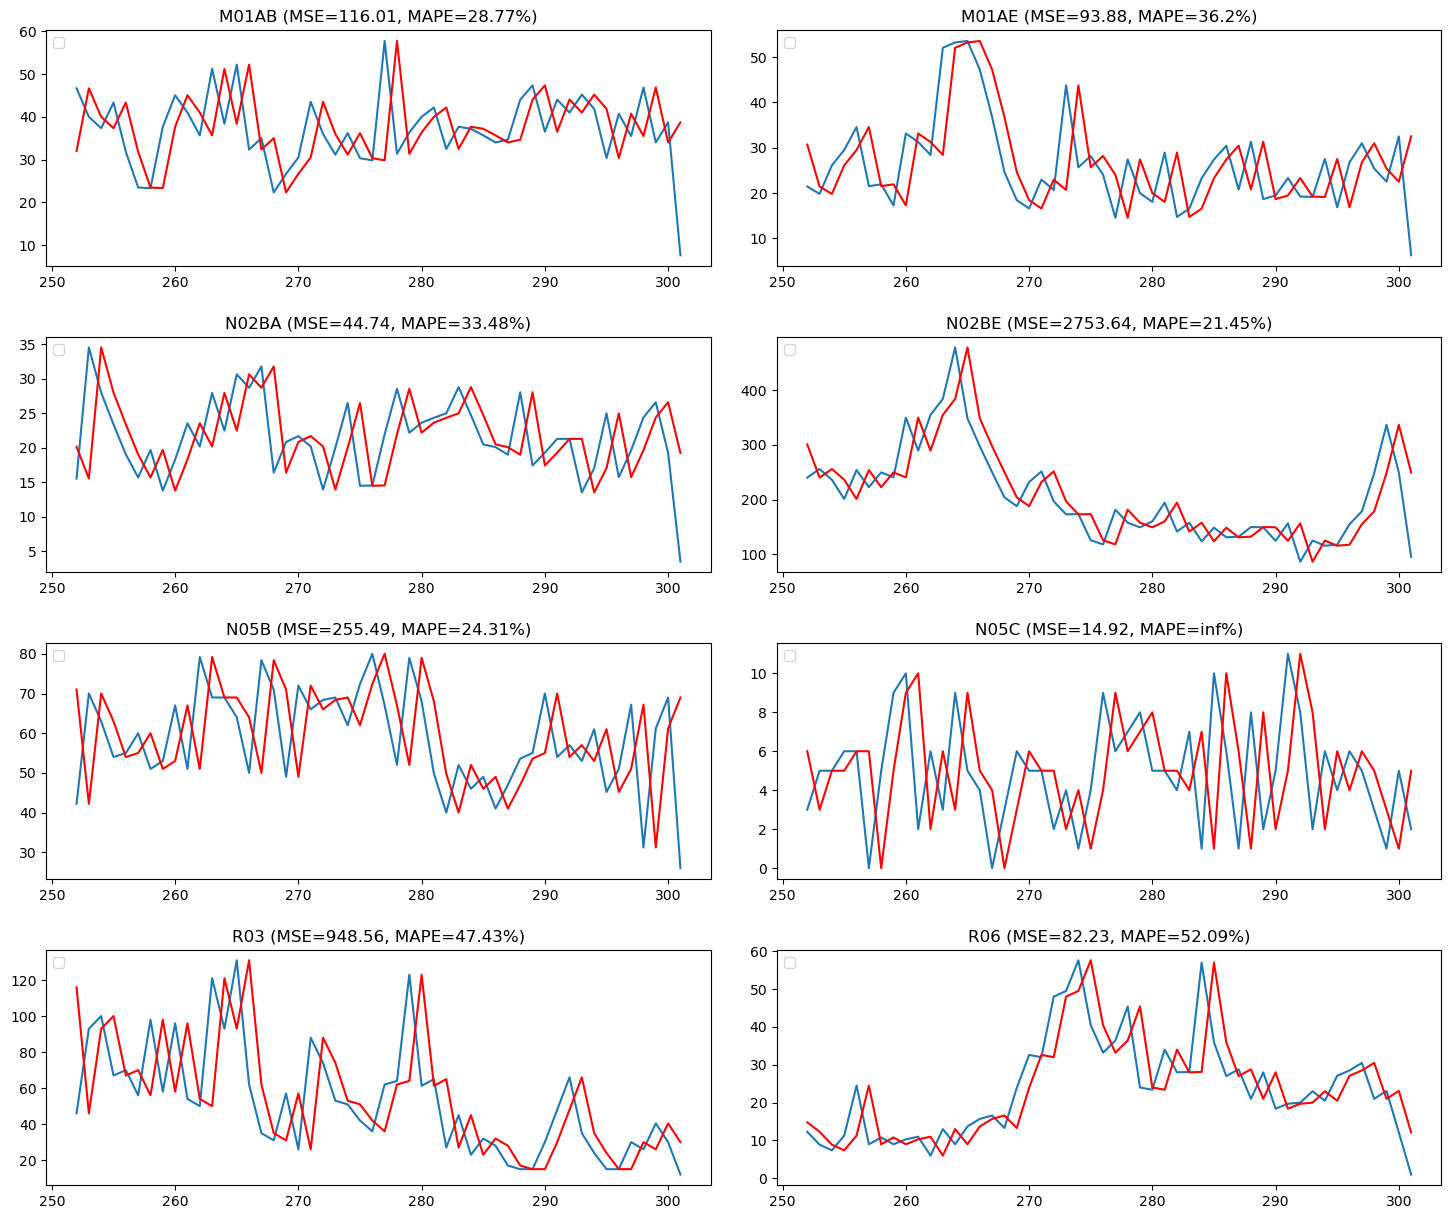

In [32]:
df=pd.read_csv('salesweekly.csv')
subplotindex=0
numrows=4
numcols=2
fig, ax = plt.subplots(numrows, numcols, figsize=(18,15))
plt.subplots_adjust(wspace=0.1, hspace=0.3)
for x in ['M01AB','M01AE','N02BA','N02BE','N05B','N05C','R03','R06']:
    rowindex=math.floor(subplotindex/numcols)
    colindex=subplotindex-(rowindex*numcols)
    ds=df[x]
    dataframe = concat([ds.shift(1), ds], axis=1)
    dataframe.columns = ['t+1', 't-1']
    size = len(dataframe)-50
    X=dataframe['t-1']
    Y=dataframe['t+1']
    test, predictions = X[size:len(X)], Y[size:len(Y)]
    error = mean_squared_error(test, predictions)
    perror = mean_absolute_percentage_error(test, predictions)
    resultsRollingdf.loc['Naive MSE',x]=error
    resultsRollingdf.loc['Naive MAPE',x]=perror
    ax[rowindex,colindex].set_title(x+' (MSE=' + str(round(error,2))+', MAPE='+ str(round(perror,2)) +'%)')
    ax[rowindex,colindex].legend(['Real', 'Predicted'], loc='upper left')
    ax[rowindex,colindex].plot(test)
    ax[rowindex,colindex].plot(predictions, color='red')
    subplotindex=subplotindex+1
plt.show()

#### 4.3.1.2. Average method forecasting

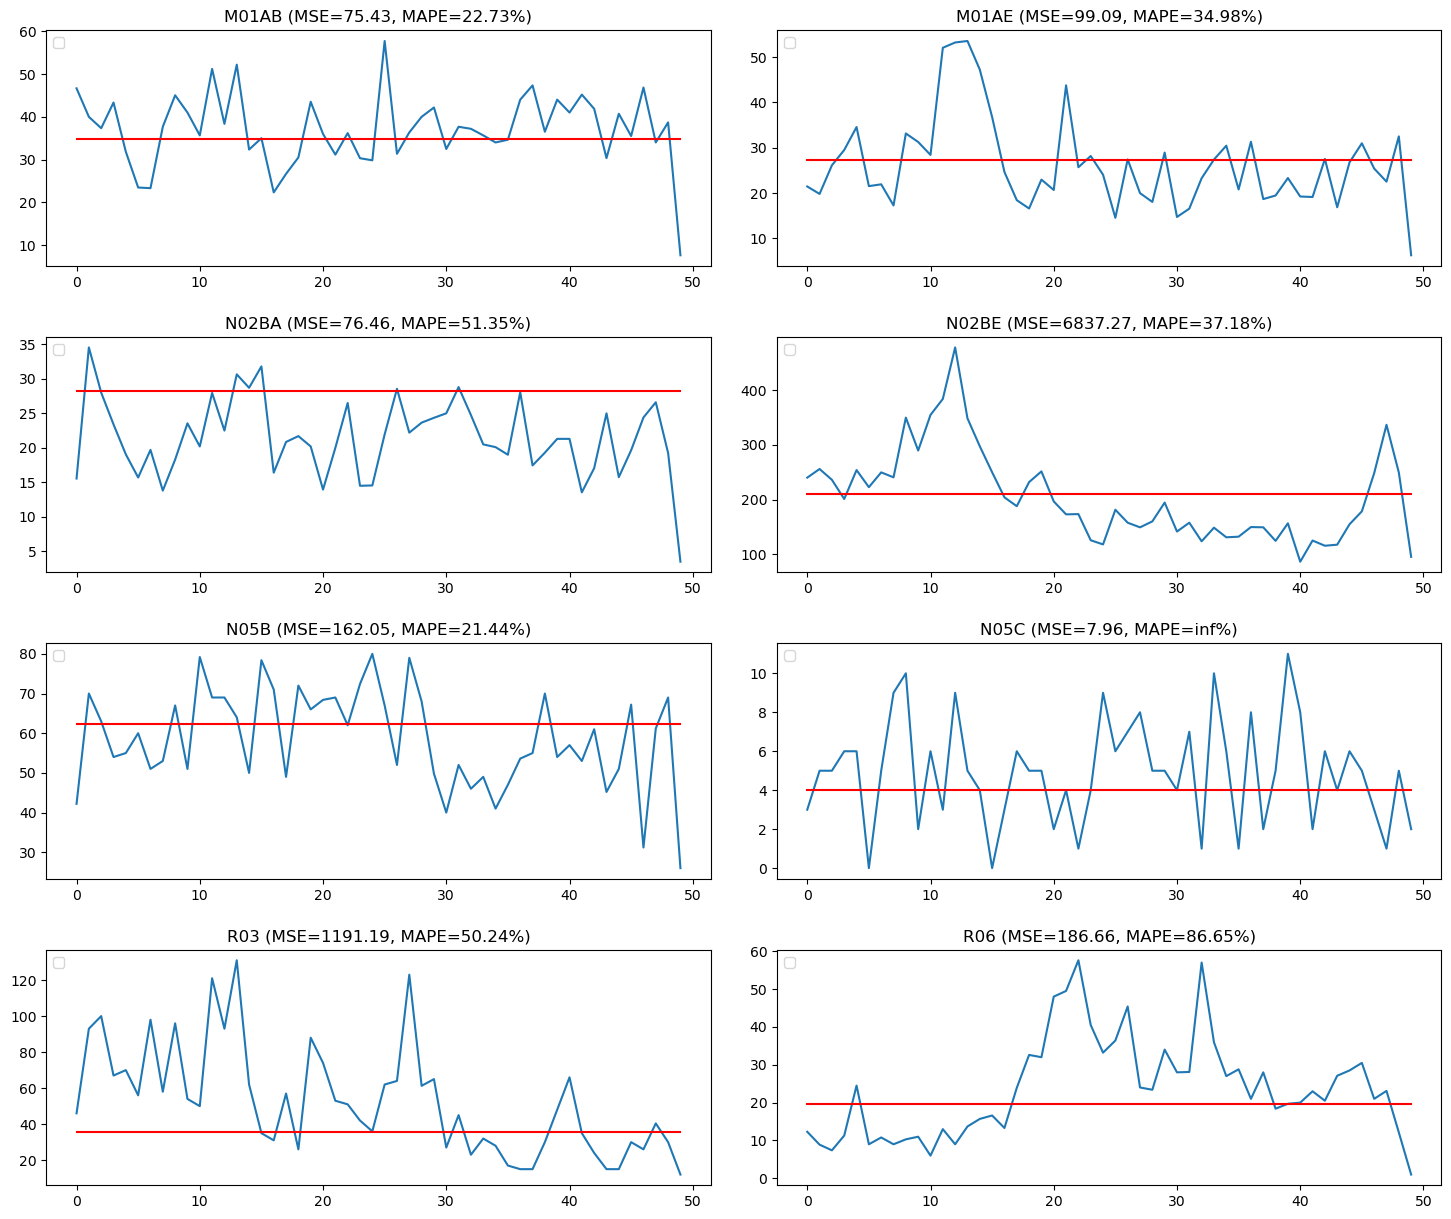

In [33]:
df=pd.read_csv('salesweekly.csv')
subplotindex=0
numrows=4
numcols=2
fig, ax = plt.subplots(numrows, numcols, figsize=(18,15))
plt.subplots_adjust(wspace=0.1, hspace=0.3)
for x in ['M01AB','M01AE','N02BA','N02BE','N05B','N05C','R03','R06']:
    rowindex=math.floor(subplotindex/numcols)
    colindex=subplotindex-(rowindex*numcols)
    X=df[x].values
    size = len(X)-50
    test = X[size:len(X)]
    mean = np.mean(X[0:size])
    predictions = np.full(50,mean)
    error = mean_squared_error(test, predictions)
    perror = mean_absolute_percentage_error(test, predictions)
    resultsLongtermdf.loc['Average MSE',x]=error
    resultsLongtermdf.loc['Average MAPE',x]=perror
    ax[rowindex,colindex].set_title(x+' (MSE=' + str(round(error,2))+', MAPE='+ str(round(perror,2)) +'%)')
    ax[rowindex,colindex].legend(['Real', 'Predicted'], loc='upper left')
    ax[rowindex,colindex].plot(test)
    ax[rowindex,colindex].plot(predictions, color='red')
    subplotindex=subplotindex+1
plt.show()

#### 4.3.1.3. Seasonal Naïve forecasting

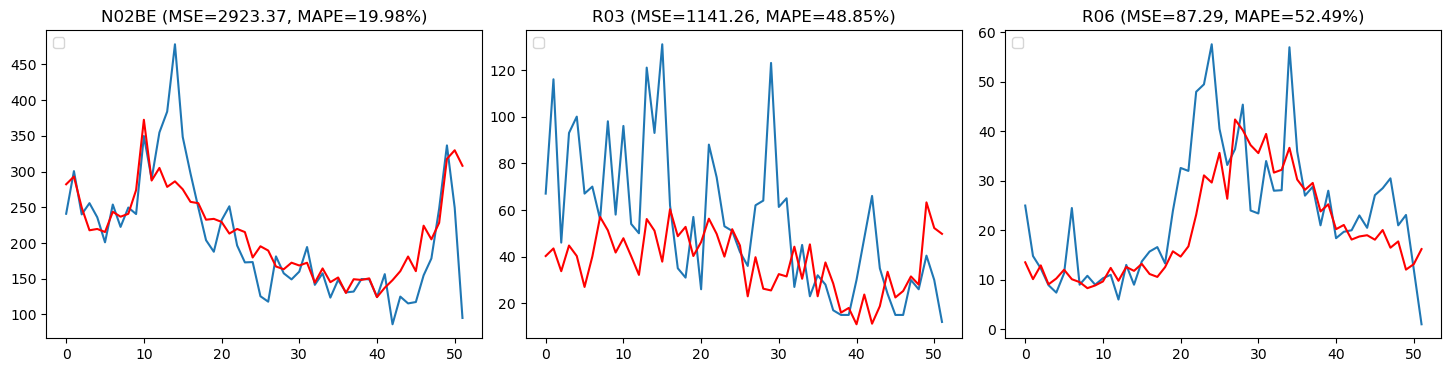

In [34]:
df=pd.read_csv('salesweekly.csv')
subplotindex=0
numrows=1
numcols=3
fig, ax = plt.subplots(numrows, numcols, figsize=(18,4))
plt.subplots_adjust(wspace=0.1, hspace=0.3)
for x in ['N02BE','R03','R06']:
    rowindex=math.floor(subplotindex/numcols)
    colindex=subplotindex-(rowindex*numcols)
    X=df[x].values
    size = len(X)-52
    test = X[size:len(X)]
    train = X[0:size]
    predictions=list()
    history = [x for x in train]
    for i in range(len(test)):
        obs=list()
        for y in range(1,5):
            obs.append(train[-(y*52)+i])
        yhat = np.mean(obs)
        predictions.append(yhat)
        history.append(test[i])
    error = mean_squared_error(test, predictions)
    perror = mean_absolute_percentage_error(test, predictions)
    resultsRollingdf.loc['Seasonal Naive MSE',x]=error
    resultsRollingdf.loc['Seasonal Naive MAPE',x]=perror
    ax[colindex].set_title(x+' (MSE=' + str(round(error,2))+', MAPE='+ str(round(perror,2)) +'%)')
    ax[colindex].legend(['Real', 'Predicted'], loc='upper left')
    ax[colindex].plot(test)
    ax[colindex].plot(predictions, color='red')
    subplotindex=subplotindex+1
plt.show()

### 4.3.2. ARIMA Forecasting

ARIMA method was used to to carry out short-term (rolling forecast) and long-term forecasting based on test data. Before each forecast is made, the process of optimizing hyper-parameters (p,d,q) of ARIMA model was carry out. Then, with optimal set of parameters, rolling forecast and long-term forecasting was carried out.
Seasonal ARIMA (SARIMA) method was tested by using Auto-ARIMA implementation. This implementation has built-in stepwise optimizer which chooses optimal set of parameters (p,d,q for non-seasonal and p,d,q,P,D,Q for seasonal series, namely N02BE, R03 and R06).

#### 4.3.2.1. Choosing parameters for ARIMA model

First, method arma_order_select_ic was used to determine initial p and q parameters. The method computes Akaike’s Information Criterion (AIC) for many ARIMA models and chooses the best configuration. It is important to note that AIC tend not to be a good guide to selecting the appropriate order of differencing (d) of a model, but only for selecting the values of p and q.

In [35]:
import statsmodels.api as sm
df=pd.read_csv('salesweekly.csv')
warnings.filterwarnings("ignore")
for x in ['M01AB','M01AE','N02BA','N02BE', 'N05B','N05C','R03','R06']:
    resDiff = sm.tsa.arma_order_select_ic(df[x], max_ar=5, max_ma=5, ic='aic', trend='c')
    print('ARMA(p,q,'+x+') =',resDiff['aic_min_order'],'is the best.')

ARMA(p,q,M01AB) = (3, 3) is the best.
ARMA(p,q,M01AE) = (2, 0) is the best.
ARMA(p,q,N02BA) = (3, 3) is the best.
ARMA(p,q,N02BE) = (2, 2) is the best.
ARMA(p,q,N05B) = (4, 3) is the best.
ARMA(p,q,N05C) = (3, 2) is the best.
ARMA(p,q,R03) = (1, 1) is the best.
ARMA(p,q,R06) = (2, 2) is the best.


However, AIC is not used to score accuracy of the forecasting methods in this research. Mean squared error is used instead. For that, reason, grid search optimization method was applied, where different combinations of the hyper-parameters were used to calculate MSE and then, the combination producing the least MSE was chosen as optimal. Grid search optimization is carried out for both approaches in forecasting: rolling and long-term.

Grid search optimization for rolling forecast produced the following best combinations of the hyper-parameters:

In [36]:
def evaluate_arima_model(X, arima_order):
    train_size = int(len(X) * 0.66)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    error = mean_squared_error(test, predictions)
    return error

def evaluate_models(f, dataset, p_values, d_values, q_values):
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    mse = evaluate_arima_model(dataset, order)
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                except:
                    continue
    print(f+' - Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))

p_values = range(0, 6)
d_values = range(0, 2)
q_values = range(0, 6)

warnings.filterwarnings("ignore")

df=pd.read_csv('salesweekly.csv')

for f in ['M01AB','M01AE','N02BA','N02BE','N05B','N05C','R03','R06']:
    evaluate_models(f, df[f].values, p_values, d_values, q_values)

M01AB - Best ARIMANone MSE=inf
M01AE - Best ARIMANone MSE=inf
N02BA - Best ARIMANone MSE=inf
N02BE - Best ARIMANone MSE=inf
N05B - Best ARIMANone MSE=inf
N05C - Best ARIMANone MSE=inf
R03 - Best ARIMANone MSE=inf
R06 - Best ARIMANone MSE=inf


Grid search optimization for long-term forecast produced the following best combinations of the hyper-parameters:

In [37]:
def evaluate_arima_model(X, arima_order):
    train_size = int(len(X) - 50)
    train, test = X[0:train_size], X[train_size:]
    model = ARIMA(train, order=arima_order)
    model_fit = model.fit()
    forecast = model_fit.predict(1,len(test))
    error = mean_squared_error(test, forecast)
    return error

def evaluate_models(f, dataset, p_values, d_values, q_values):
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    mse = evaluate_arima_model(dataset, order)
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                except:
                    continue
    print(f+' - Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))

p_values = range(0, 6)
d_values = range(0, 2)
q_values = range(0, 6)

warnings.filterwarnings("ignore")

for f in ['M01AB','M01AE','N02BA','N02BE','N05B','N05C','R03','R06']:
    evaluate_models(f, df[f].values, p_values, d_values, q_values)

M01AB - Best ARIMANone MSE=inf
M01AE - Best ARIMANone MSE=inf
N02BA - Best ARIMANone MSE=inf
N02BE - Best ARIMANone MSE=inf
N05B - Best ARIMANone MSE=inf
N05C - Best ARIMANone MSE=inf
R03 - Best ARIMANone MSE=inf
R06 - Best ARIMANone MSE=inf


From the optimization stand of point, some series are considered as so-called white noise - random time series data. Those are series for whom the best result was achieved with p=0, d=0 and q=0.

#### 4.3.2.2. Rolling forecasting with ARIMA model

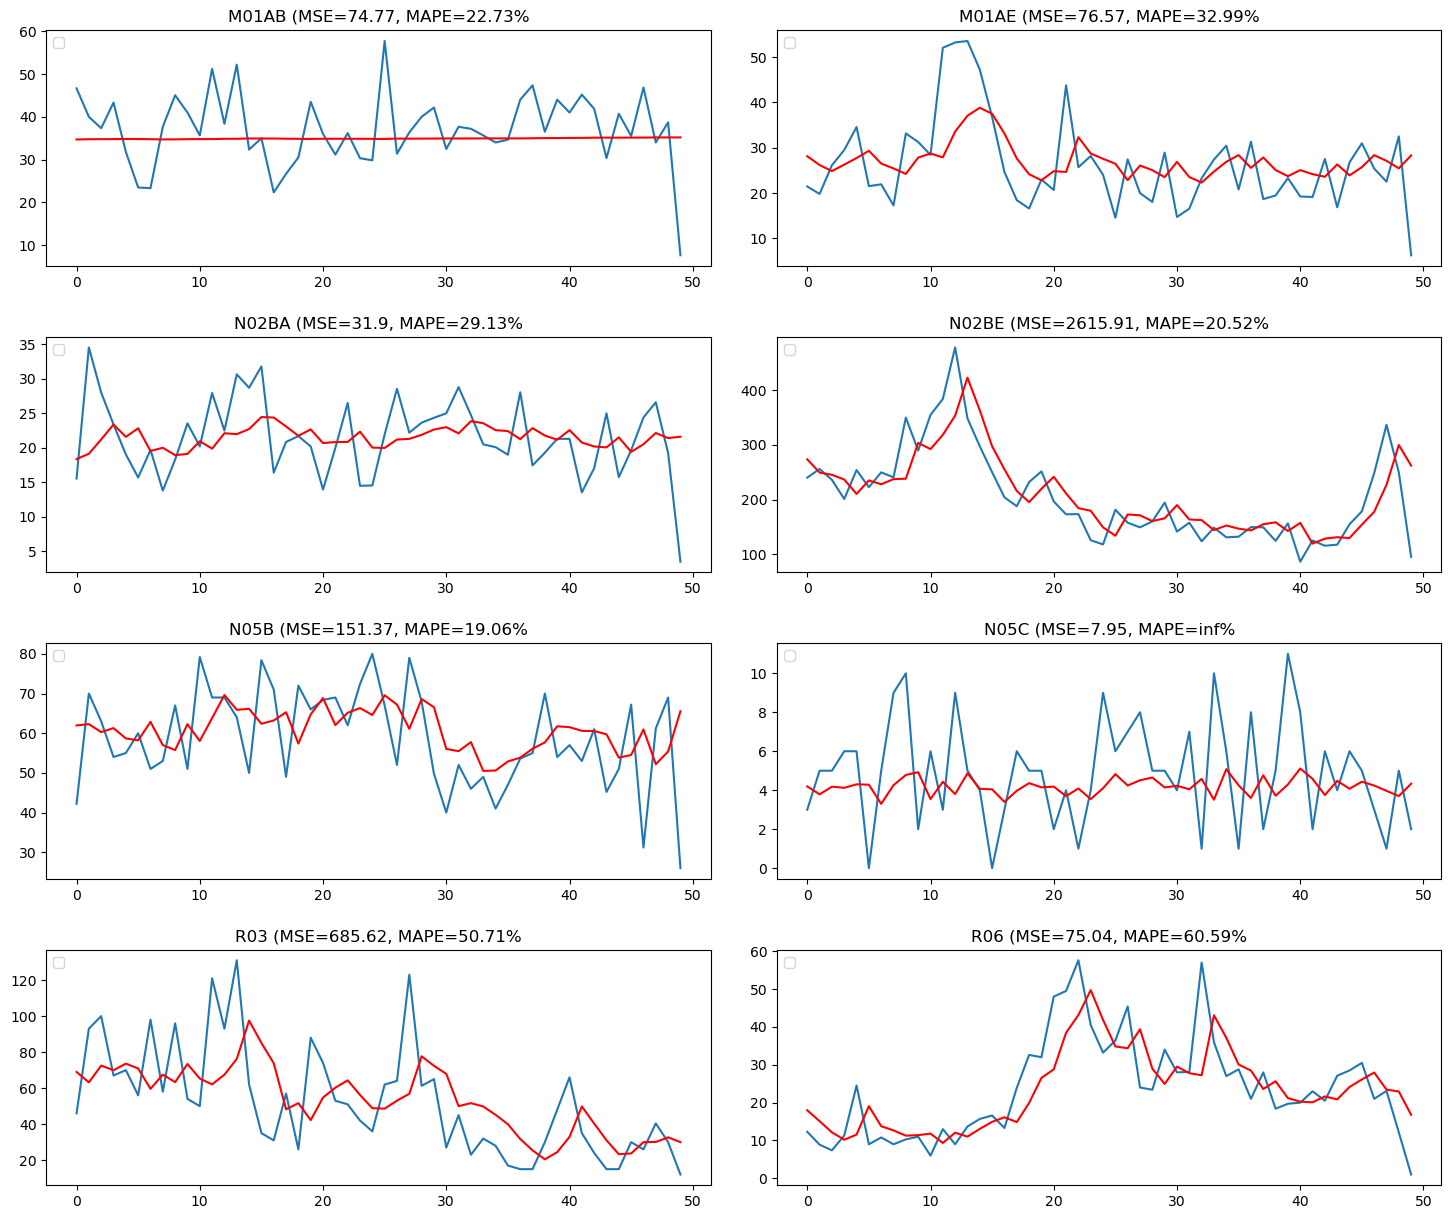

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import math
import warnings

# Load the CSV file into a DataFrame
df = pd.read_csv('salesweekly.csv')

M01AB = {'series': 'M01AB', 'p': 0, 'd': 0, 'q': 0}
M01AE = {'series': 'M01AE', 'p': 2, 'd': 0, 'q': 0}
N02BA = {'series': 'N02BA', 'p': 5, 'd': 1, 'q': 1}
N02BE = {'series': 'N02BE', 'p': 2, 'd': 0, 'q': 0}
N05B = {'series': 'N05B', 'p': 0, 'd': 0, 'q': 5}
N05C = {'series': 'N05C', 'p': 0, 'd': 0, 'q': 1}
R03 = {'series': 'R03', 'p': 5, 'd': 1, 'q': 1}
R06 = {'series': 'R06', 'p': 1, 'd': 0, 'q': 1}

subplotindex = 0
numrows = 4
numcols = 2
fig, ax = plt.subplots(numrows, numcols, figsize=(18, 15))
plt.subplots_adjust(wspace=0.1, hspace=0.3)

warnings.filterwarnings("ignore")

for x in [M01AB, M01AE, N02BA, N02BE, N05B, N05C, R03, R06]:
    rowindex = math.floor(subplotindex / numcols)
    colindex = subplotindex - (rowindex * numcols)
    X = df[x['series']].values
    size = len(X) - 50
    train, test = X[0:size], X[size:len(X)]
    history = [x for x in train]
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=(x['p'], x['d'], x['q']))
        model_fit = model.fit()
        output = model_fit.get_forecast(steps=1)
        yhat = output.predicted_mean[0]
        predictions.append(yhat)
        obs = test[t]
        history.append(obs)
    error = mean_squared_error(test, predictions)
    perror = mean_absolute_percentage_error(test, predictions)
    # Assuming 'resultsRollingdf' is your DataFrame for storing results
    resultsRollingdf.loc['ARIMA MSE', x['series']] = error
    resultsRollingdf.loc['ARIMA MAPE', x['series']] = perror
    ax[rowindex, colindex].set_title(x['series'] + ' (MSE=' + str(round(error, 2)) + ', MAPE=' + str(round(perror, 2)) + '%')
    ax[rowindex, colindex].legend(['Real', 'Predicted'], loc='upper left')
    ax[rowindex, colindex].plot(test)
    ax[rowindex, colindex].plot(predictions, color='red')
    subplotindex = subplotindex + 1

plt.show()


#### 4.3.2.3. Long-term forecasting with ARIMA model

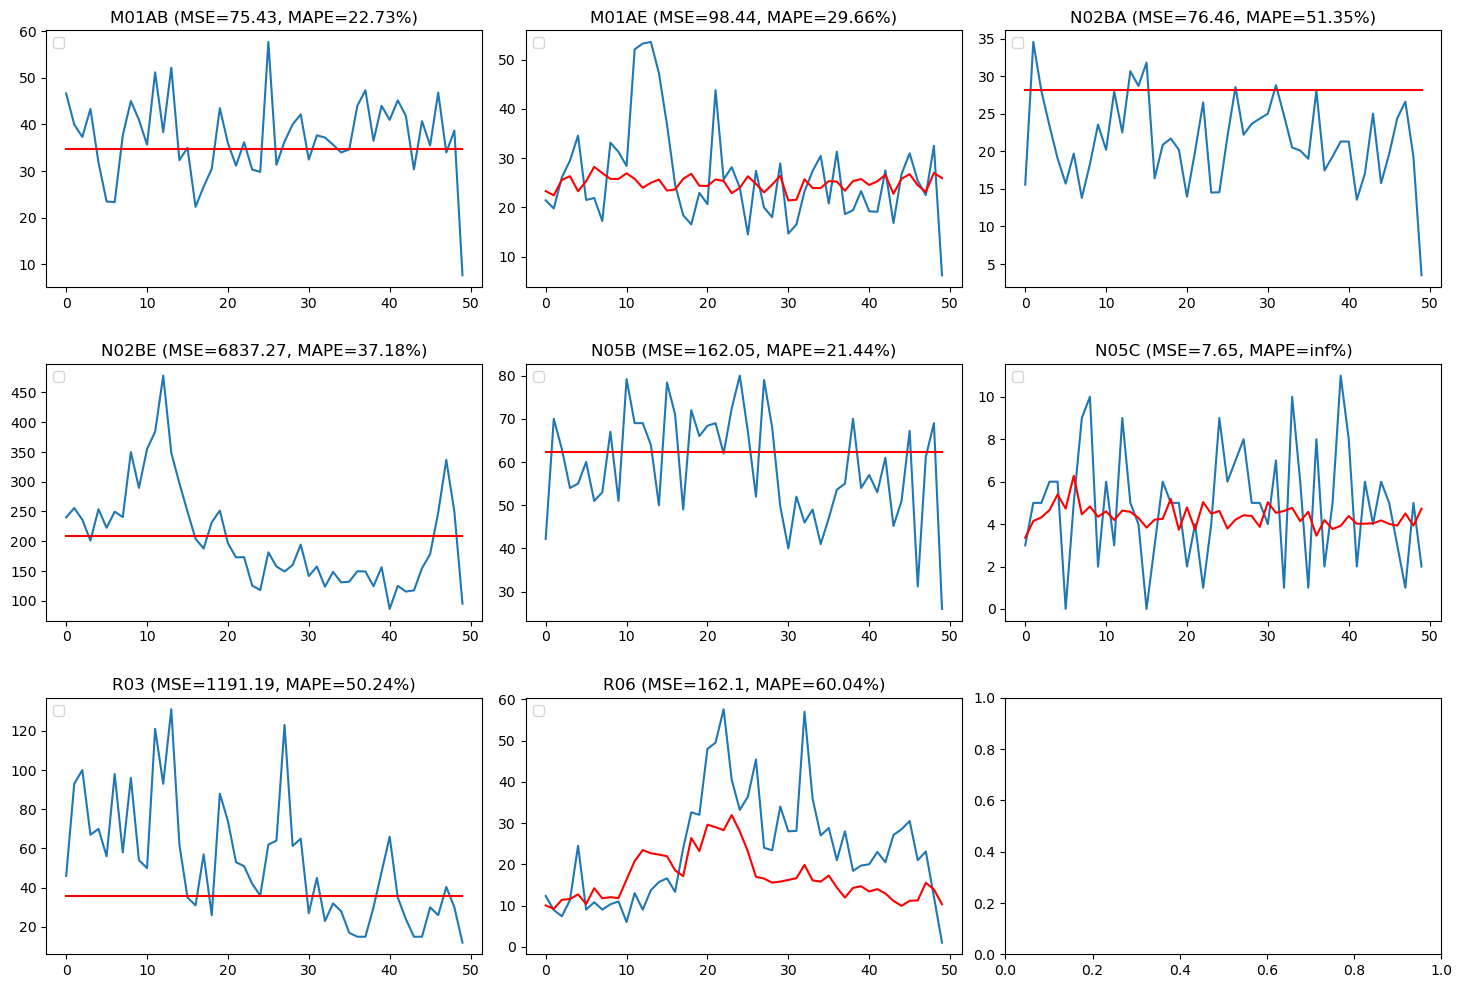

In [41]:
df=pd.read_csv('salesweekly.csv')

M01AB= {'series':'M01AB','p':0,'d':0,'q':0}
M01AE= {'series':'M01AE','p':4,'d':0,'q':4}
N02BA= {'series':'N02BA','p':0,'d':0,'q':0}
N02BE= {'series':'N02BE','p':0,'d':0,'q':0}
N05B= {'series':'N05B','p':0,'d':0,'q':0}
N05C= {'series':'N05C','p':2,'d':0,'q':2}
R03= {'series':'R03','p':0,'d':0,'q':0}
R06= {'series':'R06','p':2,'d':0,'q':2}

subplotindex=0
numrows=3
numcols=3
fig, ax = plt.subplots(numrows, numcols, figsize=(18,12))
plt.subplots_adjust(wspace=0.1, hspace=0.3)

warnings.filterwarnings("ignore")

for x in [M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06]:
    rowindex=math.floor(subplotindex/numcols)
    colindex=subplotindex-(rowindex*numcols)
    X = df[x['series']].values
    size = int(len(X) - 50)
    train, test = X[0:size], X[size:len(X)]
    model = ARIMA(train, order=(x['p'],x['d'],x['q']))
    model_fit = model.fit()
    forecast = model_fit.predict(1,len(test))
    error = mean_squared_error(test, forecast)
    perror = mean_absolute_percentage_error(test, forecast)
    resultsLongtermdf.loc['ARIMA MSE',x['series']]=error
    resultsLongtermdf.loc['ARIMA MAPE',x['series']]=perror
    ax[rowindex,colindex].set_title(x['series']+' (MSE=' + str(round(error,2))+', MAPE='+ str(round(perror,2)) +'%)')
    ax[rowindex,colindex].legend(['Real', 'Predicted'], loc='upper left')
    ax[rowindex,colindex].plot(test)
    ax[rowindex,colindex].plot(forecast, color='red')
    subplotindex=subplotindex+1
plt.show()

#### 4.3.2.4. Rolling forecasting with Auto-ARIMA model

In [42]:
!pip install pmdarima
from pmdarima import auto_arima


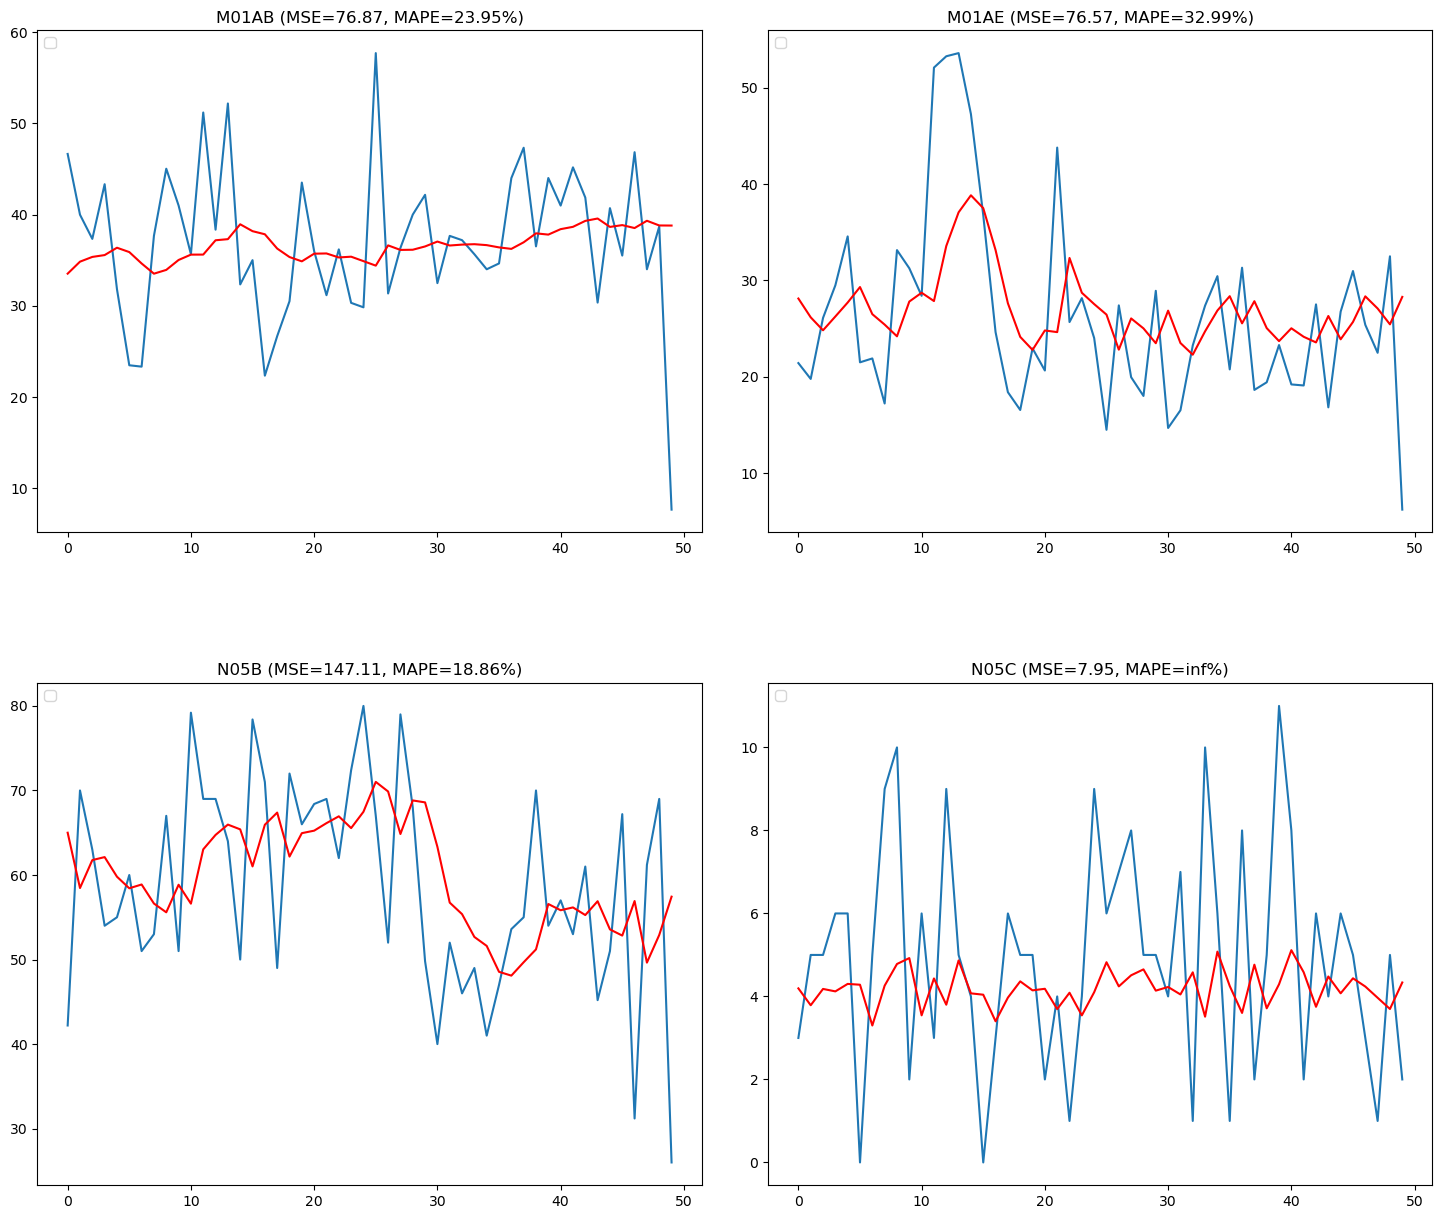

In [43]:
df=pd.read_csv('salesweekly.csv')
subplotindex=0
numrows=2
numcols=2
fig, ax = plt.subplots(numrows, numcols, figsize=(18,15))
plt.subplots_adjust(wspace=0.1, hspace=0.3)

warnings.filterwarnings("ignore")

for x in ['M01AB','M01AE','N05B','N05C']:
    rowindex=math.floor(subplotindex/numcols)
    colindex=subplotindex-(rowindex*numcols)
    X = df[x].values
    size = len(X)-50
    train, test = X[0:size], X[size:len(X)]
    history = [c for c in train]
    predictions = list()
    for t in range(len(test)):
        if (x=='N02BA' or x=='N02BE' or x=='R03' or x=='R06'):
            model = auto_arima(X, start_p=1, start_q=1,
                           max_p=5, max_q=5, m=52, max_d=1, max_D=1,
                           start_P=0, start_Q=0, max_P=5, max_Q=5, seasonal=True,
                           trace=False,
                           error_action='ignore',
                           suppress_warnings=True,
                           stepwise=True)
        else:
            model = auto_arima(X, start_p=1, start_q=1,
                           max_p=5, max_q=5, max_d=1,
                           trace=False, seasonal=False,
                           error_action='ignore',
                           suppress_warnings=True,
                           stepwise=True)
        model_fit = model.fit(history)
        output = model_fit.predict(n_periods=1)
        yhat = output[0]
        predictions.append(yhat)
        obs = test[t]
        history.append(obs)
    error = mean_squared_error(test, predictions)
    perror = mean_absolute_percentage_error(test, predictions)
    resultsRollingdf.loc['AutoARIMA MSE',x]=error
    resultsRollingdf.loc['AutoARIMA MAPE',x]=perror
    ax[rowindex,colindex].set_title(x+' (MSE=' + str(round(error,2))+', MAPE='+ str(round(perror,2)) +'%)')
    ax[rowindex,colindex].legend(['Real', 'Predicted'], loc='upper left')
    ax[rowindex,colindex].plot(test)
    ax[rowindex,colindex].plot(predictions, color='red')
    subplotindex=subplotindex+1
plt.show()

#### 4.3.2.5. Long-term forecasting with Auto-ARIMA model

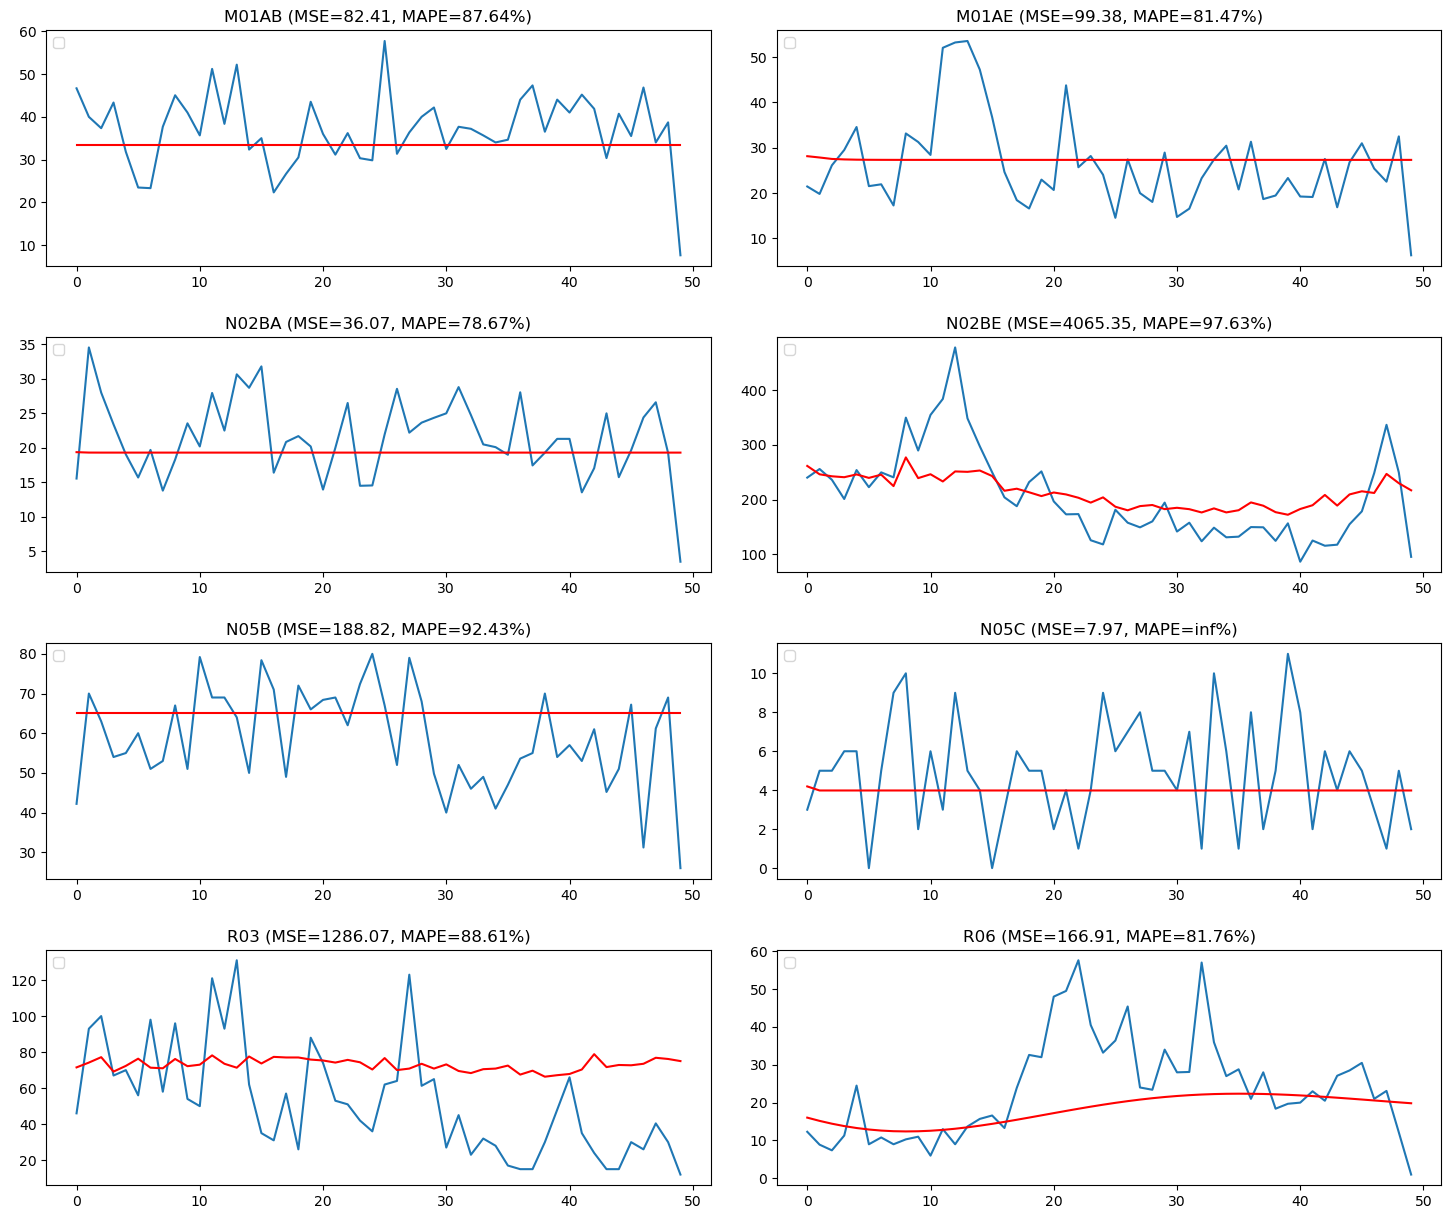

In [44]:
from pmdarima import auto_arima
df=pd.read_csv('salesweekly.csv')
subplotindex=0
numrows=4
numcols=2
fig, ax = plt.subplots(numrows, numcols, figsize=(18,15))
plt.subplots_adjust(wspace=0.1, hspace=0.3)

warnings.filterwarnings("ignore")

for x in ['M01AB','M01AE','N02BA','N02BE','N05B','N05C','R03','R06']:
    rowindex=math.floor(subplotindex/numcols)
    colindex=subplotindex-(rowindex*numcols)
    X = df[x].values
    size = int(len(X) - 50)
    train, test = X[0:size], X[size:len(X)]
    if (x=='N02BE' or x=='R03' or x=='R06'):
        model = auto_arima(X, start_p=1, start_q=1,
                           max_p=5, max_q=5, m=52, max_d=1, max_D=1,
                           start_P=0, start_Q=0, max_P=5, max_Q=5, seasonal=True,
                           trace=False,
                           error_action='ignore',
                           suppress_warnings=True,
                           stepwise=True)
    else:
        model = auto_arima(X, start_p=1, start_q=1,
                           max_p=5, max_q=5, max_d=1,
                           trace=False, seasonal=False,
                           error_action='ignore',
                           suppress_warnings=True,
                           stepwise=True)
    model_fit = model.fit(train)
    forecast = model_fit.predict(n_periods=len(test))
    error = mean_squared_error(test, forecast)
    perror = mean_absolute_percentage_error(test, predictions)
    resultsLongtermdf.loc['AutoARIMA MSE',x]=error
    resultsLongtermdf.loc['AutoARIMA MAPE',x]=perror
    ax[rowindex,colindex].set_title(x+' (MSE=' + str(round(error,2))+', MAPE='+ str(round(perror,2)) +'%)')
    ax[rowindex,colindex].legend(['Real', 'Predicted'], loc='upper left')
    ax[rowindex,colindex].plot(test)
    ax[rowindex,colindex].plot(forecast, color='red')
    subplotindex=subplotindex+1
plt.show()

### 4.3.3. Prophet forecasting

Prophet model is fited with data in two columns, where first one contains time information and is labeled as ds. Another stores actual time series data and is labeled as y.

Prophet model is tuned by using the following hyper-parameters:

- growth. For a linear trending, value should be 'linear'. If not, 'logistic'. In latter case, the cap (maximum value data will reach) and floor (minimum value data will reach) of your predictions need to be provided. This is typically determined by domain experts.
- interval_width. the uncertainty interval to produce a confidence interval around the forecast.
- fourier_order. the number of Fourier components each seasonality is composed of.
- n_changepoints. The changepoints parameter is used when the changepoint dates are supplied instead of having Prophet determine them. In practice Prophet should be let to do that alone.
- changepoint_range usually does not have that much of an effect on the performance.
- changepoint_prior_scale, is there to indicate how flexible the changepoints are allowed to be. In other words, how much can the changepoints fit to the data. If high it will be more flexible, but then overfitting is possible.
- seasonality_prior_scale parameter. This parameter will again allow your seasonalities to be more flexible.

<blockquote>While Prophet model is used both for rolling forecasts and long-term forecasting, optimization of hyper-parameters is carried out only for long-term forecasts. Optimal sets of hyper-parameters are then used also for rolling forecasts.</blockquote>

In [45]:
# !pip install --upgrade setuptools wheel
# !pip install Prophet
!pip install prophet --upgrade
!pip install holidays --upgrade


In [46]:
from prophet import Prophet


#### 4.3.3.1. Grid-search optimization of Prophet hyper-parameters

Before actual forecasting, the optimal set of hyper-parameters is determined by using grid-search method. NOTE: this is illustrative example; actual optimization is carried out with larger intervals of hyper-parameters' values.

In [47]:
from prophet import Prophet
# import Prophet
import pandas as pd
import warnings
from sklearn.metrics import mean_squared_error
from itertools import product
from joblib import Parallel, delayed
df=pd.read_csv('salesweekly.csv')

M01AB= {
    'series':'M01AB',
    'params_grid':{'growth':['linear'],'changepoint_prior_scale':[10,30,50],
               'interval_width':[0.0005]
              }
}
M01AE= {
    'series':'M01AE',
    'params_grid':{'growth':['linear'],'changepoint_prior_scale':[0.01,0.05,0.1],
               'interval_width':[0.0005]
              }
}
N02BA= {
    'series':'N02BA',
    'params_grid':{'growth':['linear'],'changepoint_prior_scale':[0.005,0.01,0.05,0.1],
                   'interval_width':[0.0005]
              }
}
N02BE= {
    'series':'N02BE',
    'params_grid':{'growth':['linear'],'changepoint_prior_scale':[5,10,50],'seasonality_prior_scale':[150,170,200],
               'interval_width':[0.0005]
              }
}
N05B= {
    'series':'N05B',
    'params_grid':{'growth':['linear'],'changepoint_prior_scale':[1,5,10],
               'interval_width':[0.0005]
              }
}
N05C= {
    'series':'N05C',
    'params_grid':{'growth':['linear'],'changepoint_prior_scale':[0.05,0.08,0.1,0.5],
               'interval_width':[0.0005]
              }
}
R03= {
    'series':'R03',
    'params_grid':{'growth':['linear'],'changepoint_prior_scale':[0.01,0.05,0.1],'seasonality_prior_scale':[120,160,200],
               'interval_width':[0.0005]
              }
}
R06= {
    'series':'R06',
    'params_grid':{'growth':['linear'],'changepoint_prior_scale':[0.01,0.05,0.1],'seasonality_prior_scale':[100,120,160,200],
               'interval_width':[0.0005]
              }
}

r=[M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06]
warnings.filterwarnings("ignore")

for x in r:
    dfg=df[['datum',x['series']]]
    dfg = dfg.rename(columns={'datum': 'ds', x['series']: 'y'})
    size = int(len(dfg) - 50)
    dfgtrain=dfg.loc[0:size,:]
    dfgtest=dfg.loc[size+1:len(dfg),:]
    predictions = list()
    minError=0
    grid = ParameterGrid(x['params_grid'])
    for p in grid:
        model = Prophet(**p, daily_seasonality=False, weekly_seasonality=False)
        if(x['series']=='N02BE' or x['series']=='R03' or x['series']=='R06'):
            model=model.add_seasonality(
                                name='yearly',
                                period=365.25,
                                fourier_order=13)
        model_fit = model.fit(dfgtrain)
        future = model.make_future_dataframe(periods=50, freq='W')
        output = model.predict(future)
        predictions=output.loc[size+2:len(dfg),:]['yhat'].values
        error = mean_squared_error(dfgtest['y'].values, predictions)
        if(minError>0):
            if(error<minError):
                minError=error
                minP=p
        else:
            minError=error
            minP=p

    print(minP)
    print('Test MSE ('+x['series']+'): %.3f' % minError)

15:37:08 - cmdstanpy - INFO - Chain [1] start processing
15:37:08 - cmdstanpy - INFO - Chain [1] done processing
15:37:09 - cmdstanpy - INFO - Chain [1] start processing
15:37:09 - cmdstanpy - INFO - Chain [1] done processing
15:37:09 - cmdstanpy - INFO - Chain [1] start processing
15:37:09 - cmdstanpy - INFO - Chain [1] done processing
15:37:10 - cmdstanpy - INFO - Chain [1] start processing


{'changepoint_prior_scale': 30, 'growth': 'linear', 'interval_width': 0.0005}
Test MSE (M01AB): 69.722


15:37:10 - cmdstanpy - INFO - Chain [1] done processing
15:37:10 - cmdstanpy - INFO - Chain [1] start processing
15:37:10 - cmdstanpy - INFO - Chain [1] done processing
15:37:10 - cmdstanpy - INFO - Chain [1] start processing
15:37:10 - cmdstanpy - INFO - Chain [1] done processing
15:37:11 - cmdstanpy - INFO - Chain [1] start processing


{'changepoint_prior_scale': 0.05, 'growth': 'linear', 'interval_width': 0.0005}
Test MSE (M01AE): 79.585


15:37:11 - cmdstanpy - INFO - Chain [1] done processing
15:37:11 - cmdstanpy - INFO - Chain [1] start processing
15:37:11 - cmdstanpy - INFO - Chain [1] done processing
15:37:11 - cmdstanpy - INFO - Chain [1] start processing
15:37:11 - cmdstanpy - INFO - Chain [1] done processing
15:37:12 - cmdstanpy - INFO - Chain [1] start processing
15:37:12 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.01, 'growth': 'linear', 'interval_width': 0.0005}
Test MSE (N02BA): 32.257


15:37:12 - cmdstanpy - INFO - Chain [1] start processing
15:37:12 - cmdstanpy - INFO - Chain [1] done processing
15:37:12 - cmdstanpy - INFO - Chain [1] start processing
15:37:13 - cmdstanpy - INFO - Chain [1] done processing
15:37:13 - cmdstanpy - INFO - Chain [1] start processing
15:37:13 - cmdstanpy - INFO - Chain [1] done processing
15:37:13 - cmdstanpy - INFO - Chain [1] start processing
15:37:14 - cmdstanpy - INFO - Chain [1] done processing
15:37:14 - cmdstanpy - INFO - Chain [1] start processing
15:37:14 - cmdstanpy - INFO - Chain [1] done processing
15:37:14 - cmdstanpy - INFO - Chain [1] start processing
15:37:15 - cmdstanpy - INFO - Chain [1] done processing
15:37:15 - cmdstanpy - INFO - Chain [1] start processing
15:37:15 - cmdstanpy - INFO - Chain [1] done processing
15:37:15 - cmdstanpy - INFO - Chain [1] start processing
15:37:16 - cmdstanpy - INFO - Chain [1] done processing
15:37:16 - cmdstanpy - INFO - Chain [1] start processing
15:37:16 - cmdstanpy - INFO - Chain [1]

{'changepoint_prior_scale': 10, 'growth': 'linear', 'interval_width': 0.0005, 'seasonality_prior_scale': 170}
Test MSE (N02BE): 3076.077


15:37:17 - cmdstanpy - INFO - Chain [1] start processing
15:37:17 - cmdstanpy - INFO - Chain [1] done processing
15:37:17 - cmdstanpy - INFO - Chain [1] start processing
15:37:17 - cmdstanpy - INFO - Chain [1] done processing
15:37:18 - cmdstanpy - INFO - Chain [1] start processing
15:37:18 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 5, 'growth': 'linear', 'interval_width': 0.0005}
Test MSE (N05B): 305.381


15:37:18 - cmdstanpy - INFO - Chain [1] start processing
15:37:18 - cmdstanpy - INFO - Chain [1] done processing
15:37:19 - cmdstanpy - INFO - Chain [1] start processing
15:37:19 - cmdstanpy - INFO - Chain [1] done processing
15:37:19 - cmdstanpy - INFO - Chain [1] start processing
15:37:19 - cmdstanpy - INFO - Chain [1] done processing
15:37:20 - cmdstanpy - INFO - Chain [1] start processing
15:37:20 - cmdstanpy - INFO - Chain [1] done processing
15:37:20 - cmdstanpy - INFO - Chain [1] start processing
15:37:20 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.5, 'growth': 'linear', 'interval_width': 0.0005}
Test MSE (N05C): 8.373


15:37:20 - cmdstanpy - INFO - Chain [1] start processing
15:37:20 - cmdstanpy - INFO - Chain [1] done processing
15:37:21 - cmdstanpy - INFO - Chain [1] start processing
15:37:21 - cmdstanpy - INFO - Chain [1] done processing
15:37:21 - cmdstanpy - INFO - Chain [1] start processing
15:37:21 - cmdstanpy - INFO - Chain [1] done processing
15:37:22 - cmdstanpy - INFO - Chain [1] start processing
15:37:22 - cmdstanpy - INFO - Chain [1] done processing
15:37:22 - cmdstanpy - INFO - Chain [1] start processing
15:37:22 - cmdstanpy - INFO - Chain [1] done processing
15:37:22 - cmdstanpy - INFO - Chain [1] start processing
15:37:22 - cmdstanpy - INFO - Chain [1] done processing
15:37:23 - cmdstanpy - INFO - Chain [1] start processing
15:37:23 - cmdstanpy - INFO - Chain [1] done processing
15:37:23 - cmdstanpy - INFO - Chain [1] start processing
15:37:23 - cmdstanpy - INFO - Chain [1] done processing


{'changepoint_prior_scale': 0.05, 'growth': 'linear', 'interval_width': 0.0005, 'seasonality_prior_scale': 160}
Test MSE (R03): 837.148


15:37:24 - cmdstanpy - INFO - Chain [1] start processing
15:37:24 - cmdstanpy - INFO - Chain [1] done processing
15:37:24 - cmdstanpy - INFO - Chain [1] start processing
15:37:24 - cmdstanpy - INFO - Chain [1] done processing
15:37:25 - cmdstanpy - INFO - Chain [1] start processing
15:37:25 - cmdstanpy - INFO - Chain [1] done processing
15:37:25 - cmdstanpy - INFO - Chain [1] start processing
15:37:25 - cmdstanpy - INFO - Chain [1] done processing
15:37:25 - cmdstanpy - INFO - Chain [1] start processing
15:37:25 - cmdstanpy - INFO - Chain [1] done processing
15:37:26 - cmdstanpy - INFO - Chain [1] start processing
15:37:26 - cmdstanpy - INFO - Chain [1] done processing
15:37:26 - cmdstanpy - INFO - Chain [1] start processing
15:37:26 - cmdstanpy - INFO - Chain [1] done processing
15:37:27 - cmdstanpy - INFO - Chain [1] start processing
15:37:27 - cmdstanpy - INFO - Chain [1] done processing
15:37:27 - cmdstanpy - INFO - Chain [1] start processing
15:37:27 - cmdstanpy - INFO - Chain [1]

{'changepoint_prior_scale': 0.05, 'growth': 'linear', 'interval_width': 0.0005, 'seasonality_prior_scale': 120}
Test MSE (R06): 76.725


#### 4.3.3.2. Rolling forecasts with Prophet

15:37:29 - cmdstanpy - INFO - Chain [1] start processing
15:37:29 - cmdstanpy - INFO - Chain [1] done processing
15:37:29 - cmdstanpy - INFO - Chain [1] start processing
15:37:29 - cmdstanpy - INFO - Chain [1] done processing
15:37:30 - cmdstanpy - INFO - Chain [1] start processing
15:37:30 - cmdstanpy - INFO - Chain [1] done processing
15:37:30 - cmdstanpy - INFO - Chain [1] start processing
15:37:30 - cmdstanpy - INFO - Chain [1] done processing
15:37:31 - cmdstanpy - INFO - Chain [1] start processing
15:37:31 - cmdstanpy - INFO - Chain [1] done processing
15:37:31 - cmdstanpy - INFO - Chain [1] start processing
15:37:31 - cmdstanpy - INFO - Chain [1] done processing
15:37:31 - cmdstanpy - INFO - Chain [1] start processing
15:37:32 - cmdstanpy - INFO - Chain [1] done processing
15:37:32 - cmdstanpy - INFO - Chain [1] start processing
15:37:32 - cmdstanpy - INFO - Chain [1] done processing
15:37:32 - cmdstanpy - INFO - Chain [1] start processing
15:37:32 - cmdstanpy - INFO - Chain [1]

15:37:59 - cmdstanpy - INFO - Chain [1] done processing
15:37:59 - cmdstanpy - INFO - Chain [1] start processing
15:37:59 - cmdstanpy - INFO - Chain [1] done processing
15:38:00 - cmdstanpy - INFO - Chain [1] start processing
15:38:00 - cmdstanpy - INFO - Chain [1] done processing
15:38:00 - cmdstanpy - INFO - Chain [1] start processing
15:38:00 - cmdstanpy - INFO - Chain [1] done processing
15:38:01 - cmdstanpy - INFO - Chain [1] start processing
15:38:01 - cmdstanpy - INFO - Chain [1] done processing
15:38:01 - cmdstanpy - INFO - Chain [1] start processing
15:38:01 - cmdstanpy - INFO - Chain [1] done processing
15:38:01 - cmdstanpy - INFO - Chain [1] start processing
15:38:01 - cmdstanpy - INFO - Chain [1] done processing
15:38:02 - cmdstanpy - INFO - Chain [1] start processing
15:38:02 - cmdstanpy - INFO - Chain [1] done processing
15:38:02 - cmdstanpy - INFO - Chain [1] start processing
15:38:02 - cmdstanpy - INFO - Chain [1] done processing
15:38:02 - cmdstanpy - INFO - Chain [1] 

15:38:24 - cmdstanpy - INFO - Chain [1] done processing
15:38:24 - cmdstanpy - INFO - Chain [1] start processing
15:38:24 - cmdstanpy - INFO - Chain [1] done processing
15:38:25 - cmdstanpy - INFO - Chain [1] start processing
15:38:25 - cmdstanpy - INFO - Chain [1] done processing
15:38:25 - cmdstanpy - INFO - Chain [1] start processing
15:38:25 - cmdstanpy - INFO - Chain [1] done processing
15:38:25 - cmdstanpy - INFO - Chain [1] start processing
15:38:26 - cmdstanpy - INFO - Chain [1] done processing
15:38:26 - cmdstanpy - INFO - Chain [1] start processing
15:38:26 - cmdstanpy - INFO - Chain [1] done processing
15:38:26 - cmdstanpy - INFO - Chain [1] start processing
15:38:27 - cmdstanpy - INFO - Chain [1] done processing
15:38:27 - cmdstanpy - INFO - Chain [1] start processing
15:38:27 - cmdstanpy - INFO - Chain [1] done processing
15:38:27 - cmdstanpy - INFO - Chain [1] start processing
15:38:28 - cmdstanpy - INFO - Chain [1] done processing
15:38:28 - cmdstanpy - INFO - Chain [1] 

15:38:58 - cmdstanpy - INFO - Chain [1] done processing
15:38:58 - cmdstanpy - INFO - Chain [1] start processing
15:38:58 - cmdstanpy - INFO - Chain [1] done processing
15:38:58 - cmdstanpy - INFO - Chain [1] start processing
15:38:58 - cmdstanpy - INFO - Chain [1] done processing
15:38:59 - cmdstanpy - INFO - Chain [1] start processing
15:38:59 - cmdstanpy - INFO - Chain [1] done processing
15:38:59 - cmdstanpy - INFO - Chain [1] start processing
15:38:59 - cmdstanpy - INFO - Chain [1] done processing
15:39:00 - cmdstanpy - INFO - Chain [1] start processing
15:39:00 - cmdstanpy - INFO - Chain [1] done processing
15:39:00 - cmdstanpy - INFO - Chain [1] start processing
15:39:00 - cmdstanpy - INFO - Chain [1] done processing
15:39:01 - cmdstanpy - INFO - Chain [1] start processing
15:39:01 - cmdstanpy - INFO - Chain [1] done processing
15:39:01 - cmdstanpy - INFO - Chain [1] start processing
15:39:01 - cmdstanpy - INFO - Chain [1] done processing
15:39:01 - cmdstanpy - INFO - Chain [1] 

15:39:25 - cmdstanpy - INFO - Chain [1] done processing
15:39:25 - cmdstanpy - INFO - Chain [1] start processing
15:39:25 - cmdstanpy - INFO - Chain [1] done processing
15:39:25 - cmdstanpy - INFO - Chain [1] start processing
15:39:25 - cmdstanpy - INFO - Chain [1] done processing
15:39:26 - cmdstanpy - INFO - Chain [1] start processing
15:39:26 - cmdstanpy - INFO - Chain [1] done processing
15:39:26 - cmdstanpy - INFO - Chain [1] start processing
15:39:26 - cmdstanpy - INFO - Chain [1] done processing
15:39:26 - cmdstanpy - INFO - Chain [1] start processing
15:39:26 - cmdstanpy - INFO - Chain [1] done processing
15:39:27 - cmdstanpy - INFO - Chain [1] start processing
15:39:27 - cmdstanpy - INFO - Chain [1] done processing
15:39:27 - cmdstanpy - INFO - Chain [1] start processing
15:39:27 - cmdstanpy - INFO - Chain [1] done processing
15:39:27 - cmdstanpy - INFO - Chain [1] start processing
15:39:28 - cmdstanpy - INFO - Chain [1] done processing
15:39:28 - cmdstanpy - INFO - Chain [1] 

15:39:50 - cmdstanpy - INFO - Chain [1] done processing
15:39:50 - cmdstanpy - INFO - Chain [1] start processing
15:39:50 - cmdstanpy - INFO - Chain [1] done processing
15:39:50 - cmdstanpy - INFO - Chain [1] start processing
15:39:50 - cmdstanpy - INFO - Chain [1] done processing
15:39:51 - cmdstanpy - INFO - Chain [1] start processing
15:39:51 - cmdstanpy - INFO - Chain [1] done processing
15:39:51 - cmdstanpy - INFO - Chain [1] start processing
15:39:51 - cmdstanpy - INFO - Chain [1] done processing
15:39:51 - cmdstanpy - INFO - Chain [1] start processing
15:39:51 - cmdstanpy - INFO - Chain [1] done processing
15:39:52 - cmdstanpy - INFO - Chain [1] start processing
15:39:52 - cmdstanpy - INFO - Chain [1] done processing
15:39:52 - cmdstanpy - INFO - Chain [1] start processing
15:39:52 - cmdstanpy - INFO - Chain [1] done processing
15:39:52 - cmdstanpy - INFO - Chain [1] start processing
15:39:52 - cmdstanpy - INFO - Chain [1] done processing
15:39:53 - cmdstanpy - INFO - Chain [1] 

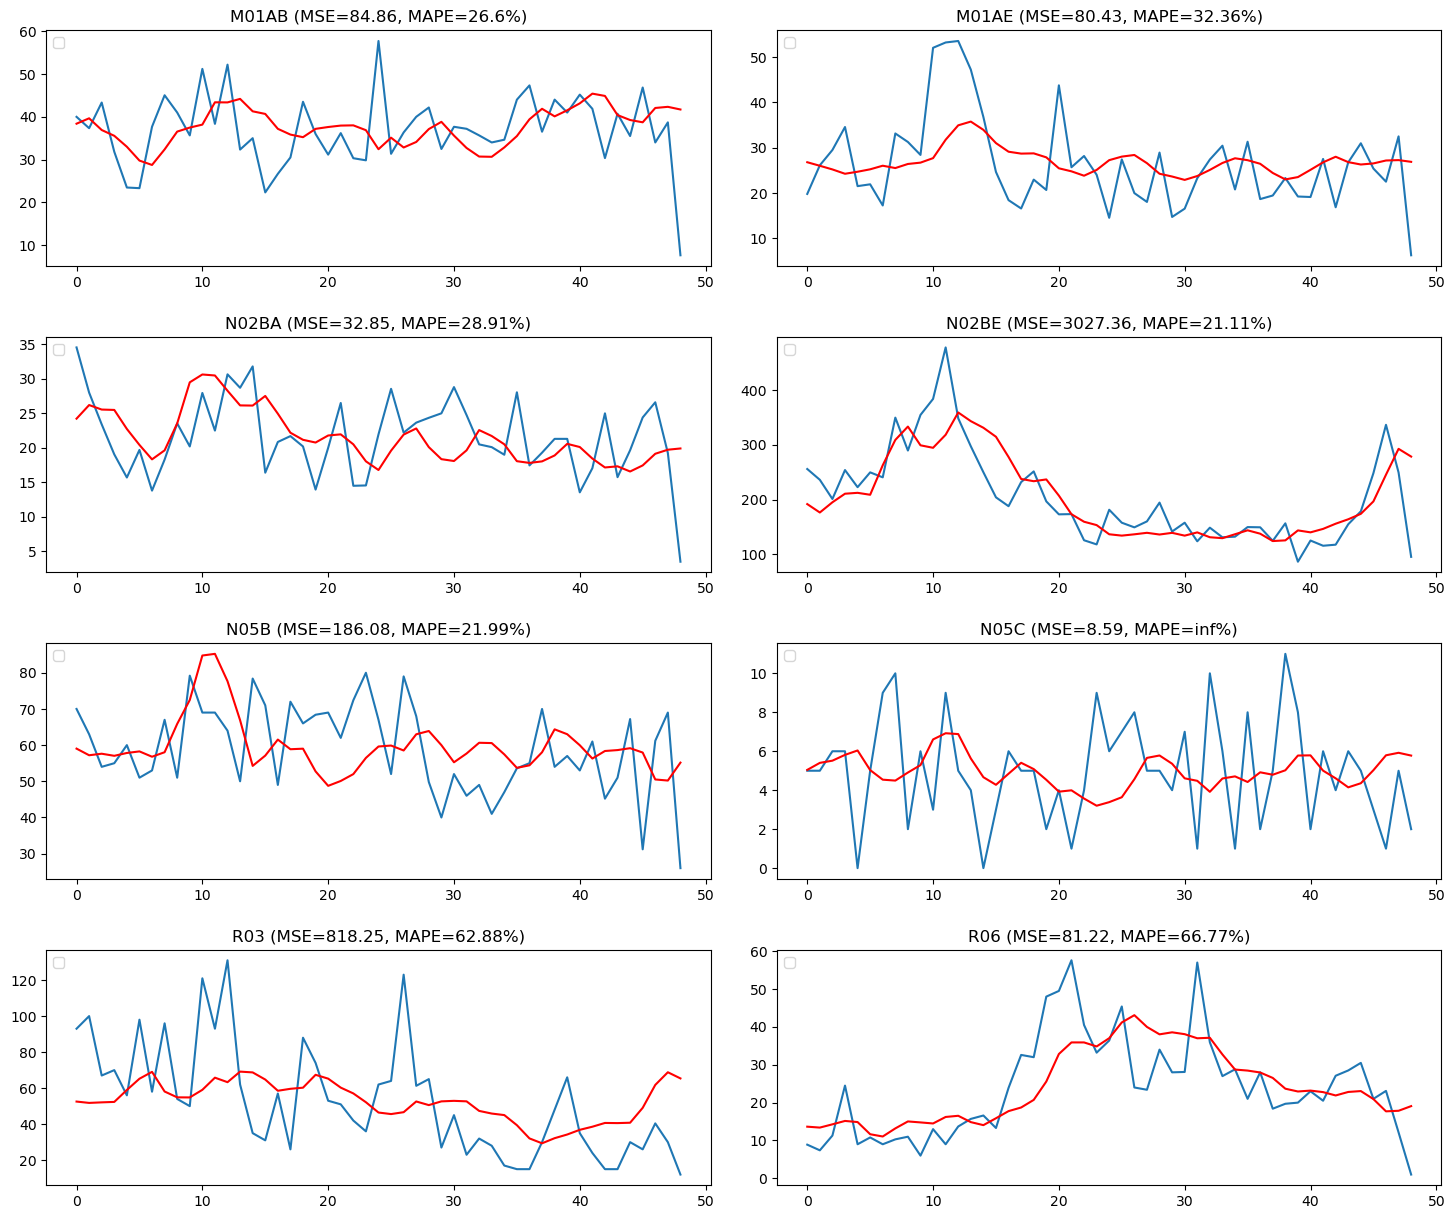

In [48]:
df=pd.read_csv('salesweekly.csv')

subplotindex=0
numrows=4
numcols=2
fig, ax = plt.subplots(numrows, numcols, figsize=(18,15))
plt.subplots_adjust(wspace=0.1, hspace=0.3)

warnings.filterwarnings("ignore")

M01AB= {'series':'M01AB','params_grid':{'changepoint_prior_scale':30,'interval_width':0.0005}}
M01AE= {'series':'M01AE','params_grid':{'changepoint_prior_scale':0.05,'interval_width':0.0005}}
N02BA= {'series':'N02BA','params_grid':{'changepoint_prior_scale':0.005,'interval_width':0.0005}}
N02BE= {'series':'N02BE','params_grid':{'changepoint_prior_scale':10,'seasonality_prior_scale':170,'interval_width':0.0005}}
N05B= {'series':'N05B','params_grid':{'changepoint_prior_scale':5,'interval_width':0.0005}}
N05C= {'series':'N05C','params_grid':{'changepoint_prior_scale':0.5,'interval_width':0.005}}
R03= {'series':'R03','params_grid':{'changepoint_prior_scale':0.05,'seasonality_prior_scale':160,'interval_width':0.0005}}
R06= {'series':'R06','params_grid':{'changepoint_prior_scale':0.05,'seasonality_prior_scale':120,'interval_width':0.0005}}

r=[M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06]

for x in r:
    rowindex=math.floor(subplotindex/numcols)
    colindex=subplotindex-(rowindex*numcols)
    dfg=df[['datum',x['series']]]
    dfg = dfg.rename(columns={'datum': 'ds', x['series']: 'y'})
    size = len(dfg) - 50
    dfgtrain=dfg.loc[0:size,:]
    dfgtest=dfg.loc[size+1:len(dfg),:]
    history = dfgtrain.copy()
    predictions = list()

    for t in dfgtest['ds'].values:
        model = Prophet(changepoint_prior_scale=x['params_grid']['changepoint_prior_scale'],
                                  growth='linear',
                                  interval_width=x['params_grid']['interval_width'],
                                  daily_seasonality=False,
                                  weekly_seasonality=False
                           )
        if(x['series']=='N02BE' or x['series']=='R03' or x['series']=='R06'):
            model=model.add_seasonality(
                                name='yearly',
                                period=365.25,
                                prior_scale=x['params_grid']['seasonality_prior_scale'],
                                fourier_order=13)
        model_fit = model.fit(history)
        future = model.make_future_dataframe(periods=1, freq='W')
        output = model.predict(future)
        yhat = output.loc[output.ds==t]['yhat'].values[0]
        predictions.append(yhat)
        obs = dfgtest.loc[dfgtest.ds==t]['y'].values[0]
        dd=pd.DataFrame([[t,obs]],columns=['ds','y'])
        history=history.append(dd)

    error = mean_squared_error(dfgtest['y'].values, predictions)
    perror = mean_absolute_percentage_error(dfgtest['y'].values, predictions)
    resultsRollingdf.loc['Prophet MSE',x['series']]=error
    resultsRollingdf.loc['Prophet MAPE',x['series']]=perror
    ax[rowindex,colindex].set_title(x['series']+' (MSE=' + str(round(error,2))+', MAPE='+ str(round(perror,2)) +'%)')
    ax[rowindex,colindex].legend(['Real', 'Predicted'], loc='upper left')
    ax[rowindex,colindex].plot(dfgtest['y'].values)
    ax[rowindex,colindex].plot(predictions, color='red')
    subplotindex=subplotindex+1
plt.show()

#### 4.3.3.3. Long-term forecasting with Prophet

15:40:00 - cmdstanpy - INFO - Chain [1] start processing
15:40:00 - cmdstanpy - INFO - Chain [1] done processing
15:40:01 - cmdstanpy - INFO - Chain [1] start processing
15:40:01 - cmdstanpy - INFO - Chain [1] done processing
15:40:01 - cmdstanpy - INFO - Chain [1] start processing
15:40:01 - cmdstanpy - INFO - Chain [1] done processing
15:40:01 - cmdstanpy - INFO - Chain [1] start processing
15:40:02 - cmdstanpy - INFO - Chain [1] done processing
15:40:02 - cmdstanpy - INFO - Chain [1] start processing
15:40:02 - cmdstanpy - INFO - Chain [1] done processing
15:40:02 - cmdstanpy - INFO - Chain [1] start processing
15:40:02 - cmdstanpy - INFO - Chain [1] done processing
15:40:03 - cmdstanpy - INFO - Chain [1] start processing
15:40:03 - cmdstanpy - INFO - Chain [1] done processing
15:40:03 - cmdstanpy - INFO - Chain [1] start processing
15:40:03 - cmdstanpy - INFO - Chain [1] done processing


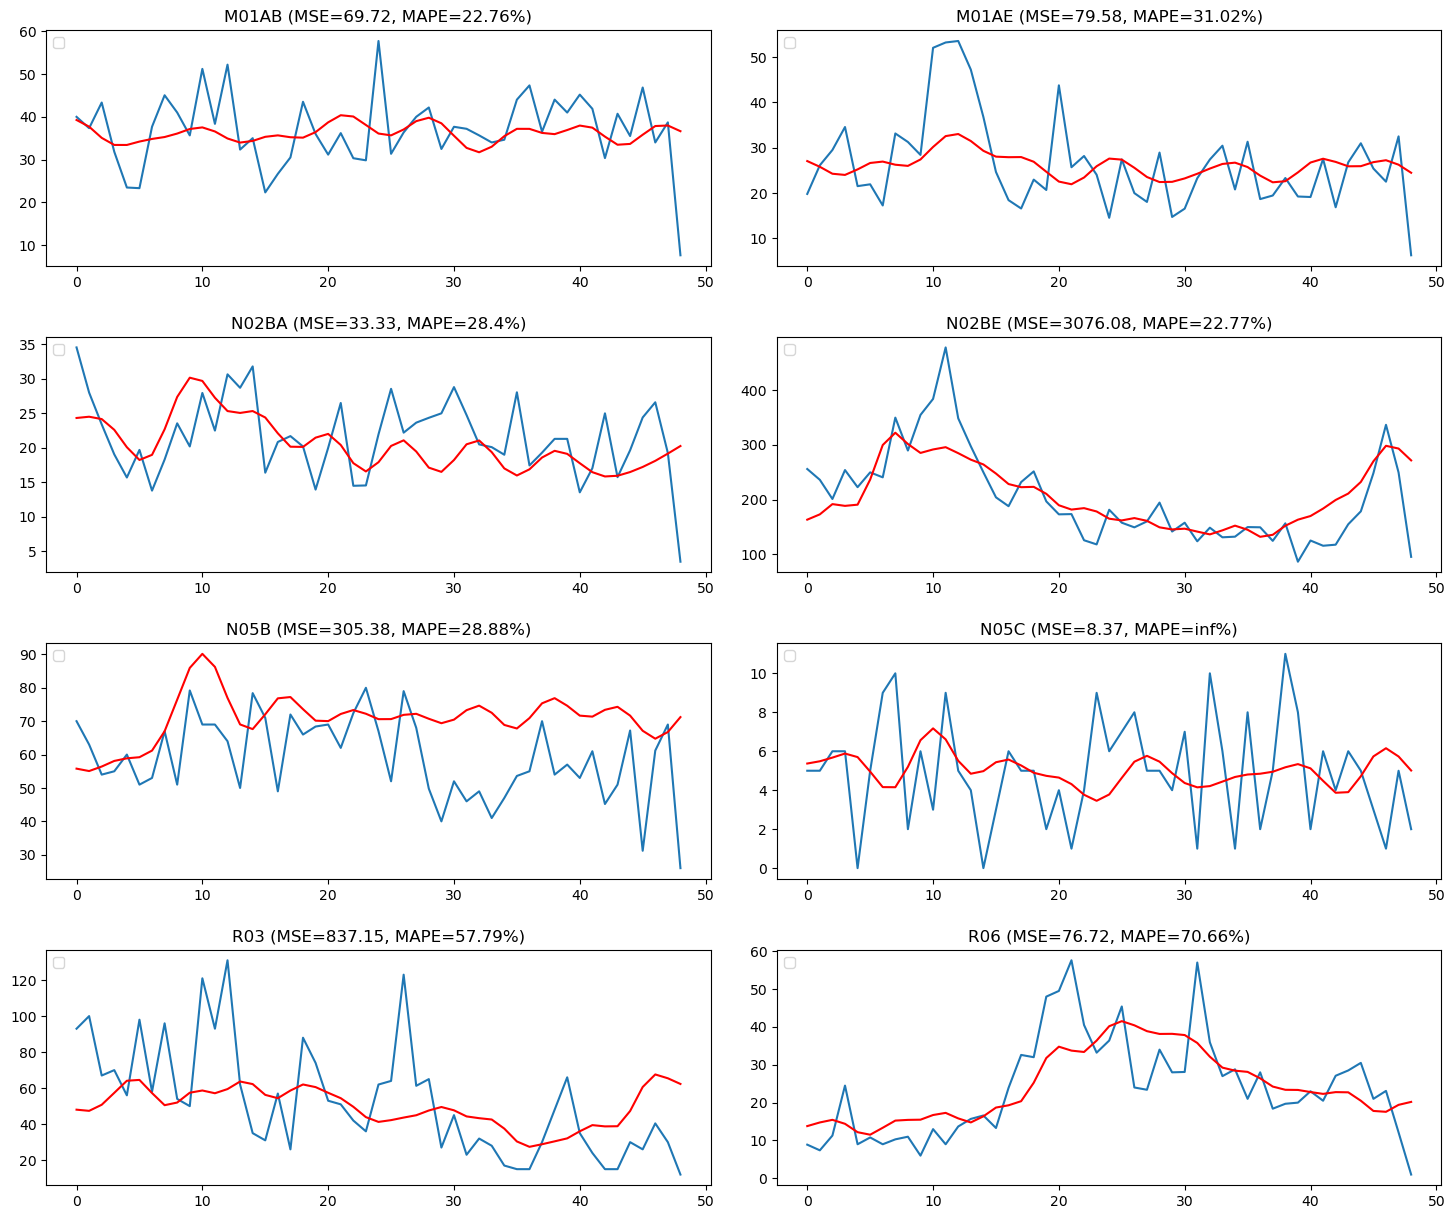

In [49]:
df=pd.read_csv('salesweekly.csv')

subplotindex=0
numrows=4
numcols=2
fig, ax = plt.subplots(numrows, numcols, figsize=(18,15))
plt.subplots_adjust(wspace=0.1, hspace=0.3)

warnings.filterwarnings("ignore")

M01AB= {'series':'M01AB','params_grid':{'changepoint_prior_scale':30,'interval_width':0.0005}}
M01AE= {'series':'M01AE','params_grid':{'changepoint_prior_scale':0.05,'interval_width':0.0005}}
N02BA= {'series':'N02BA','params_grid':{'changepoint_prior_scale':0.005,'interval_width':0.0005}}
N02BE= {'series':'N02BE','params_grid':{'changepoint_prior_scale':10,'seasonality_prior_scale':170,'interval_width':0.0005}}
N05B= {'series':'N05B','params_grid':{'changepoint_prior_scale':5,'interval_width':0.0005}}
N05C= {'series':'N05C','params_grid':{'changepoint_prior_scale':0.5,'interval_width':0.005}}
R03= {'series':'R03','params_grid':{'changepoint_prior_scale':0.05,'seasonality_prior_scale':160,'interval_width':0.0005}}
R06= {'series':'R06','params_grid':{'changepoint_prior_scale':0.05,'seasonality_prior_scale':120,'interval_width':0.0005}}

r=[M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06]

for x in r:
    rowindex=math.floor(subplotindex/numcols)
    colindex=subplotindex-(rowindex*numcols)
    dfg=df[['datum',x['series']]]
    dfg = dfg.rename(columns={'datum': 'ds', x['series']: 'y'})
    size = int(len(dfg) - 50)
    dfgtrain=dfg.loc[0:size,:]
    dfgtest=dfg.loc[size+1:len(dfg),:]
    predictions = list()
    model = Prophet(changepoint_prior_scale=x['params_grid']['changepoint_prior_scale'],
                              growth='linear', interval_width=x['params_grid']['interval_width'],
                              daily_seasonality=False,
                              weekly_seasonality=False
                           )
    if(x['series']=='N02BE' or x['series']=='R03' or x['series']=='R06'):
        model=model.add_seasonality(
                                name='yearly',
                                period=365.25,
                                prior_scale=x['params_grid']['seasonality_prior_scale'],
                                fourier_order=13)
    model_fit = model.fit(dfgtrain)
    future = model.make_future_dataframe(periods=50, freq='W')
    output = model.predict(future)
    predictions=output.loc[size+2:len(dfg),:]['yhat'].values

    error = mean_squared_error(dfgtest['y'].values, predictions)
    perror = mean_absolute_percentage_error(dfgtest['y'].values, predictions)
    resultsLongtermdf.loc['Prophet MSE',x['series']]=error
    resultsLongtermdf.loc['Prophet MAPE',x['series']]=perror
    ax[rowindex,colindex].set_title(x['series']+' (MSE=' + str(round(error,2))+', MAPE='+ str(round(perror,2)) +'%)')
    ax[rowindex,colindex].legend(['Real', 'Predicted'], loc='upper left')
    ax[rowindex,colindex].plot(dfgtest['y'].values)
    ax[rowindex,colindex].plot(predictions, color='red')
    subplotindex=subplotindex+1
plt.show()

### 4.3.4. Forecasting with LSTM

Long-term forecasting validation has been done with three LSTM configurations: Vanilla LSTM, Stacked LSTM and Bi-directional LSTM. Relu activation function was used, optimizer was Adam and loss function was Mean Squared Error. The best results were achieved with training the model in 400 epochs. Before fitting, all data was standardized (rescaled in interval -1,1) and transformed to data for supervised problem.

Number of past observations tested in input sequences was either 10 or 5. For series with larger variances and randomness (N05B and N05C) and simpler, Vanilla LSTM model, 10 past observations produced better forecasting accuracy. In all other cases, 5 past observations were used. This is the parameter that has been adopted.

In order to get reproducible results in forecasting with LSTM, following values are fixed: seed value, 'PYTHONHASHSEED' environment variable, Python's, numpy's and Tensorflow's built-in pseudo-random generators. A new global Tensorflow session is configured.

In [50]:
!pip install tensorflow
!pip install tensorflow==2.3 


ERROR: Could not find a version that satisfies the requirement tensorflow==2.3 (from versions: 2.12.0rc0, 2.12.0rc1, 2.12.0, 2.12.1, 2.13.0rc0, 2.13.0rc1, 2.13.0rc2, 2.13.0, 2.13.1, 2.14.0rc0, 2.14.0rc1, 2.14.0, 2.15.0rc0)
ERROR: No matching distribution found for tensorflow==2.3


In [51]:
seed_value= 0
import os
os.environ['PYTHONHASHSEED']=str(seed_value)
import random
random.seed(seed_value)
import numpy as np
np.random.seed(seed_value)
import tensorflow as tf
tf.random.set_seed(seed_value)

session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
tf.compat.v1.keras.backend.set_session(sess)

Components required for forecasting with LSTM are then imported. Function split_sequence for transforming time-series data to data for supervised machine learning problem is provided, including constants, such as number of previous steps to take into account.

In [52]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Bidirectional
from sklearn.preprocessing import MinMaxScaler

def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        end_ix = i + n_steps
        if end_ix > len(sequence)-1:
            break
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

size = int(len(df) - 50)
n_steps=5
n_features = 1

#### 4.3.4.1. Long-term forecasting with Vanilla LSTM configuration

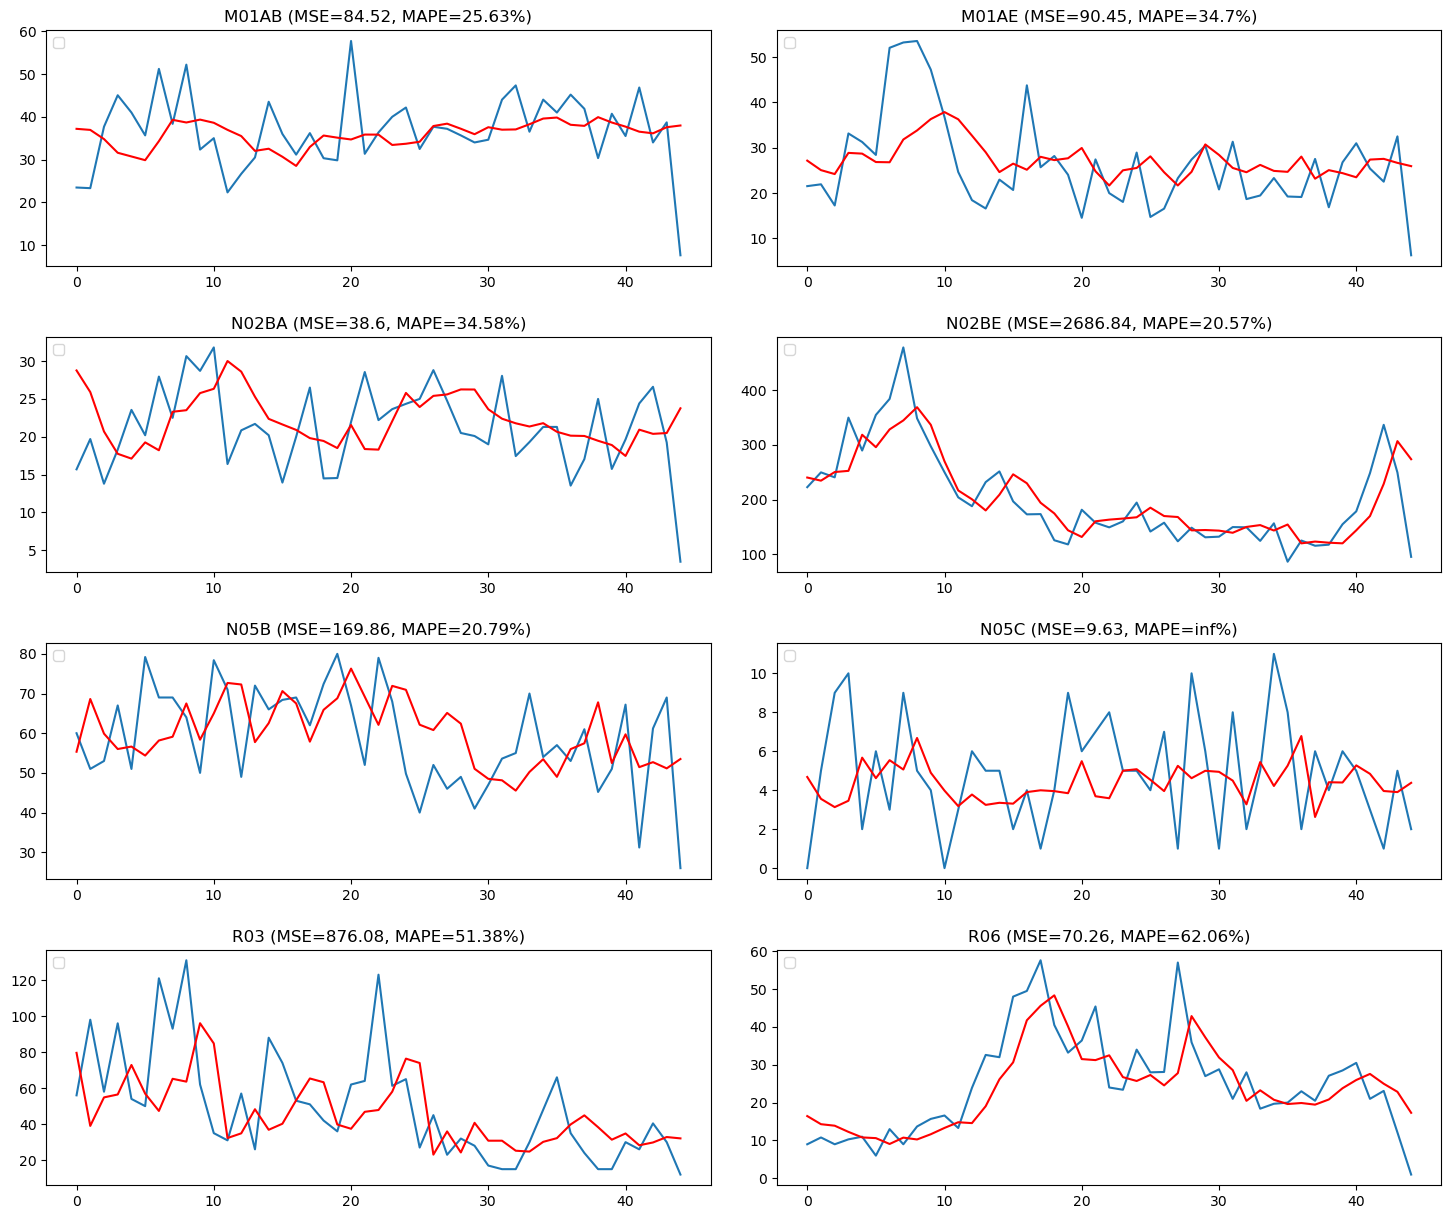

In [53]:
df=pd.read_csv('salesweekly.csv')

subplotindex=0
numrows=4
numcols=2
fig, ax = plt.subplots(numrows, numcols, figsize=(18,15))
plt.subplots_adjust(wspace=0.1, hspace=0.3)

warnings.filterwarnings("ignore")

r=['M01AB','M01AE','N02BA','N02BE','N05B','N05C','R03','R06']
for x in r:
    rowindex=math.floor(subplotindex/numcols)
    colindex=subplotindex-(rowindex*numcols)
    X=df[x].values
    scaler = MinMaxScaler(feature_range = (0, 1))
    X=scaler.fit_transform(X.reshape(-1, 1))
    X_train,y_train=split_sequence(X[0:size], n_steps)
    X_test,y_test=split_sequence(X[size:len(df)], n_steps)
    X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], n_features))
    model = Sequential()
    model.add(LSTM(100, activation='relu', input_shape=(n_steps, n_features)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    model.fit(X_train, y_train, epochs=400, verbose=0)
    X_test = X_test.reshape((len(X_test), n_steps, n_features))
    predictions = model.predict(X_test, verbose=0)
    y_test=scaler.inverse_transform(y_test)
    predictions = scaler.inverse_transform(predictions)
    error = mean_squared_error(y_test, predictions)
    perror = mean_absolute_percentage_error(y_test, predictions)
    resultsLongtermdf.loc['Vanilla LSTM MSE',x]=error
    resultsLongtermdf.loc['Vanilla LSTM MAPE',x]=perror
    ax[rowindex,colindex].set_title(x+' (MSE=' + str(round(error,2))+', MAPE='+ str(round(perror,2)) +'%)')
    ax[rowindex,colindex].legend(['Real', 'Predicted'], loc='upper left')
    ax[rowindex,colindex].plot(y_test)
    ax[rowindex,colindex].plot(predictions, color='red')
    subplotindex=subplotindex+1
plt.show()

#### 4.3.4.2. Long-term forecasting with Stacked LSTM model

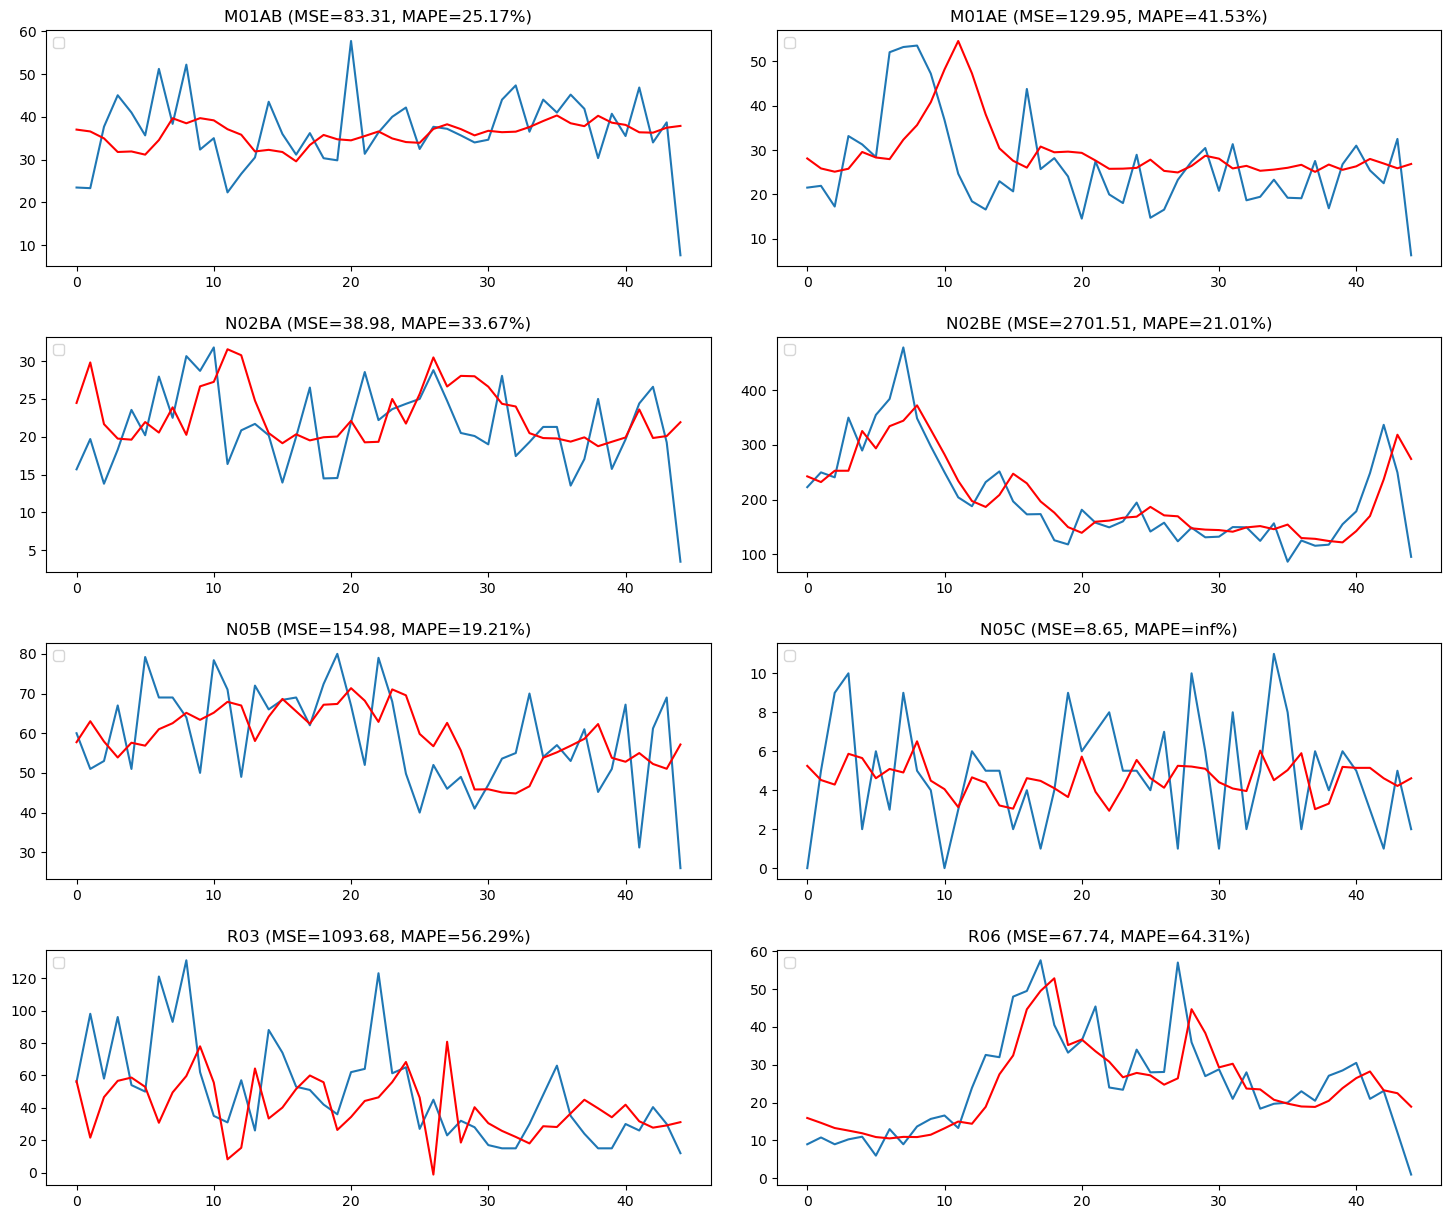

In [54]:
df=pd.read_csv('salesweekly.csv')

subplotindex=0
numrows=4
numcols=2
fig, ax = plt.subplots(numrows, numcols, figsize=(18,15))
plt.subplots_adjust(wspace=0.1, hspace=0.3)

warnings.filterwarnings("ignore")

r=['M01AB','M01AE','N02BA','N02BE','N05B','N05C','R03','R06']
for x in r:
    rowindex=math.floor(subplotindex/numcols)
    colindex=subplotindex-(rowindex*numcols)
    X=df[x].values
    scaler = MinMaxScaler(feature_range = (0, 1))
    X=scaler.fit_transform(X.reshape(-1, 1))
    X_train,y_train=split_sequence(X[0:size], n_steps)
    X_test,y_test=split_sequence(X[size:len(df)], n_steps)
    X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], n_features))

    model = Sequential()
    model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
    model.add(LSTM(100, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    model.fit(X_train, y_train, epochs=400, verbose=0)

    X_test = X_test.reshape((len(X_test), n_steps, n_features))
    predictions = model.predict(X_test, verbose=0)
    y_test=scaler.inverse_transform(y_test)
    predictions = scaler.inverse_transform(predictions)
    error = mean_squared_error(y_test, predictions)
    perror = mean_absolute_percentage_error(y_test, predictions)
    resultsLongtermdf.loc['Stacked LSTM MSE',x]=error
    resultsLongtermdf.loc['Stacked LSTM MAPE',x]=perror
    ax[rowindex,colindex].set_title(x+' (MSE=' + str(round(error,2))+', MAPE='+ str(round(perror,2)) +'%)')
    ax[rowindex,colindex].legend(['Real', 'Predicted'], loc='upper left')
    ax[rowindex,colindex].plot(y_test)
    ax[rowindex,colindex].plot(predictions, color='red')
    subplotindex=subplotindex+1
plt.show()

#### 4.3.4.3. Long-term forecasting with Bidirectional LSTM

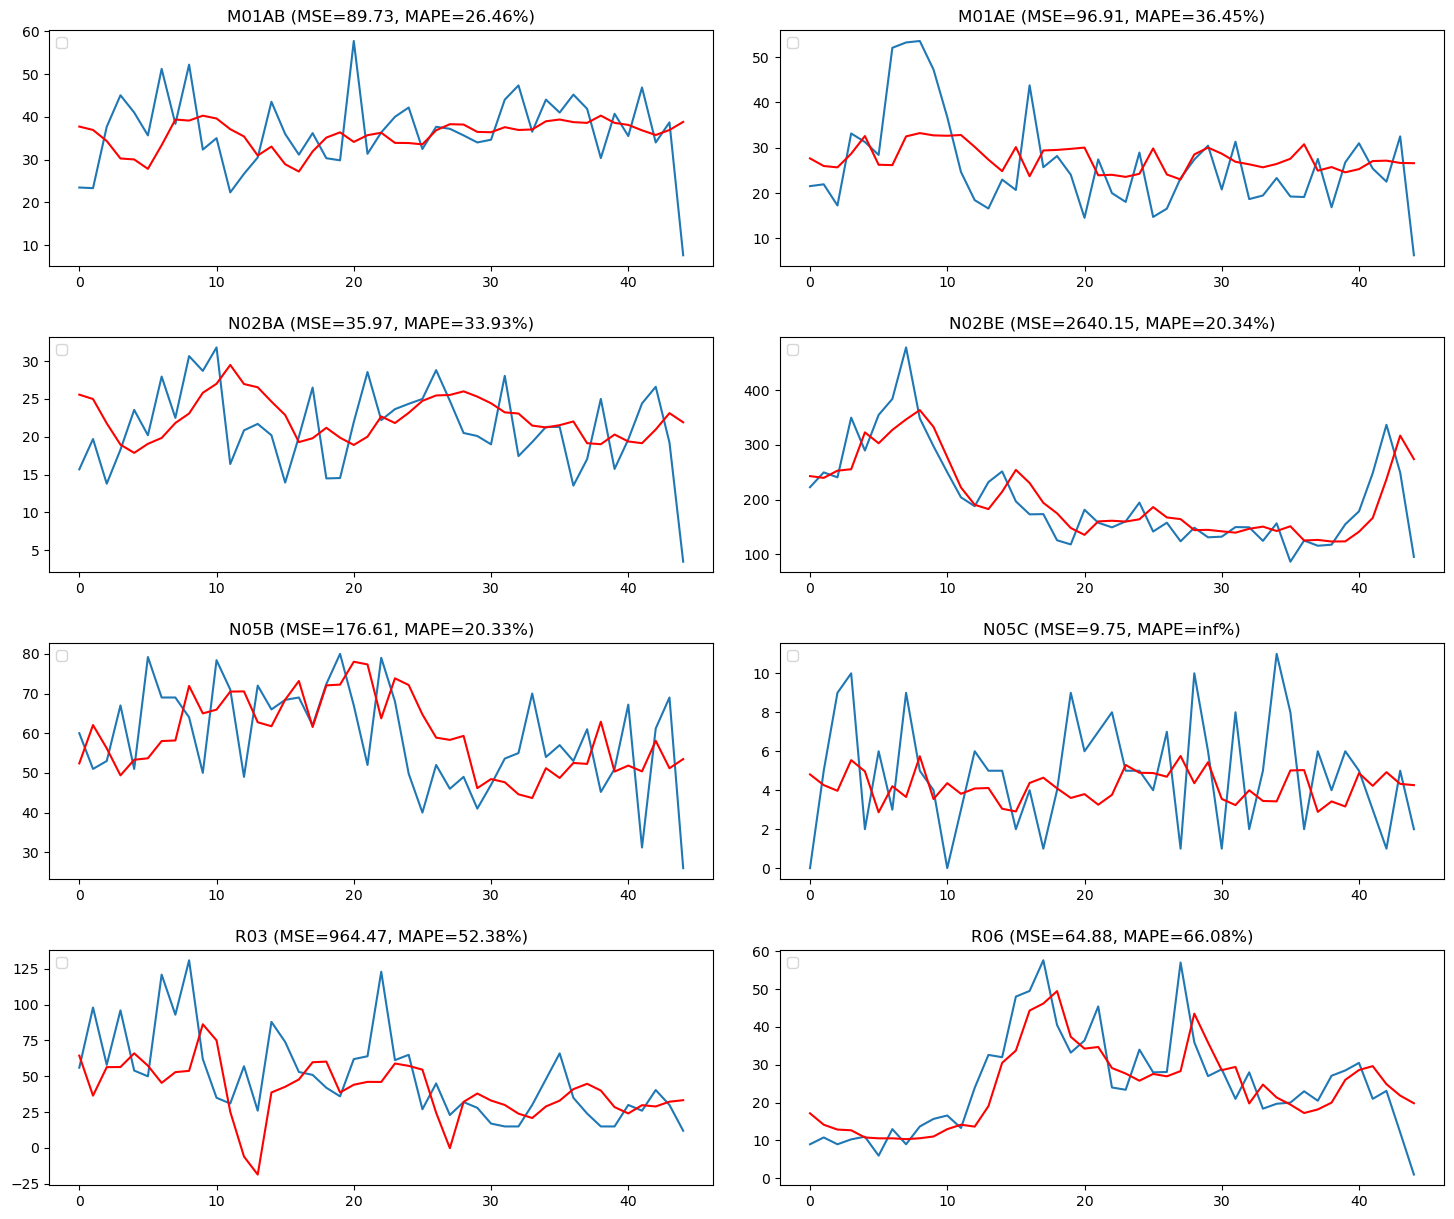

In [55]:
df=pd.read_csv('salesweekly.csv')

subplotindex=0
numrows=4
numcols=2
fig, ax = plt.subplots(numrows, numcols, figsize=(18,15))
plt.subplots_adjust(wspace=0.1, hspace=0.3)

warnings.filterwarnings("ignore")

r=['M01AB','M01AE','N02BA','N02BE','N05B','N05C','R03','R06']
for x in r:
    rowindex=math.floor(subplotindex/numcols)
    colindex=subplotindex-(rowindex*numcols)
    X=df[x].values
    scaler = MinMaxScaler(feature_range = (0, 1))
    X=scaler.fit_transform(X.reshape(-1, 1))
    X_train,y_train=split_sequence(X[0:size], n_steps)
    X_test,y_test=split_sequence(X[size:len(df)], n_steps)
    X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], n_features))

    model = Sequential()
    model.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(n_steps, n_features)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    model.fit(X_train, y_train, epochs=400, verbose=0)

    X_test = X_test.reshape((len(X_test), n_steps, n_features))
    predictions = model.predict(X_test, verbose=0)
    y_test=scaler.inverse_transform(y_test)
    predictions = scaler.inverse_transform(predictions)
    error = mean_squared_error(y_test, predictions)
    perror = mean_absolute_percentage_error(y_test, predictions)
    resultsLongtermdf.loc['Bidirectional LSTM MSE',x]=error
    resultsLongtermdf.loc['Bidirectional LSTM MAPE',x]=perror
    ax[rowindex,colindex].set_title(x+' (MSE=' + str(round(error,2))+', MAPE='+ str(round(perror,2)) +'%)')
    ax[rowindex,colindex].legend(['Real', 'Predicted'], loc='upper left')
    ax[rowindex,colindex].plot(y_test)
    ax[rowindex,colindex].plot(predictions, color='red')
    subplotindex=subplotindex+1
plt.show()

# 5. Conclusion

For rolling forecast, ARIMA method (Auto-ARIMA for series with seasonal character) outperforms Prophet and is considered as a best candidate for short-term sales forecasting. All methods in all cases (with exception of Prophet N02BE) outperform reference benchmarks - Naive and Seasonal Naive forecasts.

In [56]:
from IPython.display import display, HTML
display(HTML(resultsRollingdf.to_html()))

For long-term forecasting, Prophet and LSTM models have shown significantly better performance then benchmarks in the time series with seasonality. In all cases, even without optimization, LSTM models have achieved competitive performance.

In [57]:
from IPython.display import display, HTML
display(HTML(resultsLongtermdf.to_html()))

To conclude, time-series analyses and forecasts have guided potentially useful conclusions and recommendations to the pharmacy. Daily, weekly and annual seasonality analysis were proven useful for identifying the periods in which special sales and marketing campaigns could be implemented, except for N05B and N05C categories of drugs which did not exhibit significant regularities. Forecasts have proven better than Naïve methods and in acceptable intervals for long-term planning. It is highly likely that the forecasts could be significantly improved by expanding the problem scope to multivariate time series forecasting and by including explanatory variables, such as:
- Weather data. Sales of antirheumatic drugs in M01AB and M01AE categories could be affected by the changes of atmospheric pressure. Sudden declines in all categories could be explained by extreme weather conditions, such as heavy rain, thunderstorms and blizzards.
- Price of the drugs. Sales spikes may be explained by the discounts, applied in a short term. Introducing this feature may facilitate what-if forecasting analysis of sales performance during marketing campaigns involving price reductions.
- Dates of the pension payoff. Sales spikes are visible at the dates of state pensions payoff.
- National holidays, as non-working days with seasonal patterns similar to Sundays are expected to disrupt daily sales.

Future work on univariate time series forecasting includes increasing the number of data, exploring different other accuracy metrics, optimization of hyper-parameters for LSTM models and testing other architectures, such as CNN LSTM and ConvLSTM. However, key improvements in sales forecasting are expected from reducing the uncertainty of the models by expanding to multivariate time series forecasting problem, as explained above.
